# EasyVisa Project

## Context:

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

## Objective:

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired your firm EasyVisa for data-driven solutions. You as a data scientist have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status.


## Data Description

The data contains the different attributes of the employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment.
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

## Importing necessary libraries and data

In [2]:
# Installing the libraries with the specified version.
!pip install xgboost==2.0.3

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [327]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

# importing the sklearn and model_selection
from sklearn import metrics
from sklearn.ensemble import AdaBoostClassifier,BaggingClassifier,GradientBoostingClassifier,RandomForestClassifier
import statsmodels.api as sm
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import confusion_matrix
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier


## Data Overview

- Observations
- Sanity checks

### Read the data

In [5]:
data= pd.read_csv("EasyVisa.csv")
df= data.copy()
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


### checking the Shape, Describtion, and info of the data

In [6]:
df.shape

(25480, 12)

***Observation***
- The data has 25480 rows and 12 columns 

In [7]:
df.describe()

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.000000,25480.000000,25480.000000
mean,5667.043210,1979.409929,74455.814592
std,22877.928848,42.366929,52815.942327
min,-26.000000,1800.000000,2.136700
25%,1022.000000,1976.000000,34015.480000
50%,2109.000000,1997.000000,70308.210000
75%,3504.000000,2005.000000,107735.512500
max,602069.000000,2016.000000,319210.270000


***Observation***
- The Oldest company that is yr_of_estab is 216 year back 
- Prevailing_wage min is 2.14 Dollar. Which need to check in further. 
- no_of_employees which is in negitive -26 need to check in further. 

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


***Observation***
- The Data-set has 1-float, 2-int and 9-object 
- There is no null values in the data-set 
- Need to check for the duplicates in the data-set 

### Checking the null and duplicates in Data-Set

In [14]:
df.isnull().sum()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

***Observation***
- There is no null in the dataset 

In [15]:
df.duplicated().sum()

0

***Observation***
- There is no dulicates in the dataset

### Checking for categorical data 

In [20]:
cat=df.select_dtypes(include=np.object_).columns.to_list()
for i in  (cat):
    print(df[i].value_counts())
    print("***"*25)

case_id
EZYV01       1
EZYV16995    1
EZYV16993    1
EZYV16992    1
EZYV16991    1
            ..
EZYV8492     1
EZYV8491     1
EZYV8490     1
EZYV8489     1
EZYV25480    1
Name: count, Length: 25480, dtype: int64
***************************************************************************
continent
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: count, dtype: int64
***************************************************************************
education_of_employee
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: count, dtype: int64
***************************************************************************
has_job_experience
Y    14802
N    10678
Name: count, dtype: int64
***************************************************************************
requires_job_training
N    22525
Y     2955
Name: count, dtype: int64
***************************************

***Observation***
- `education_of_employee`: Max number of have Bachelor's (10234), and followed by Master's(9634)
- `has_job_experience`: Max Number of people have the job experience (14802).
- `requires_job_training`: Very Less amount of people required job Training.
- `continent`: Asia(16861) are the heighest 
- `full_time_position`:22773 are fulltime employees 

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

### Creating the functions for the EDA

<Axes: >

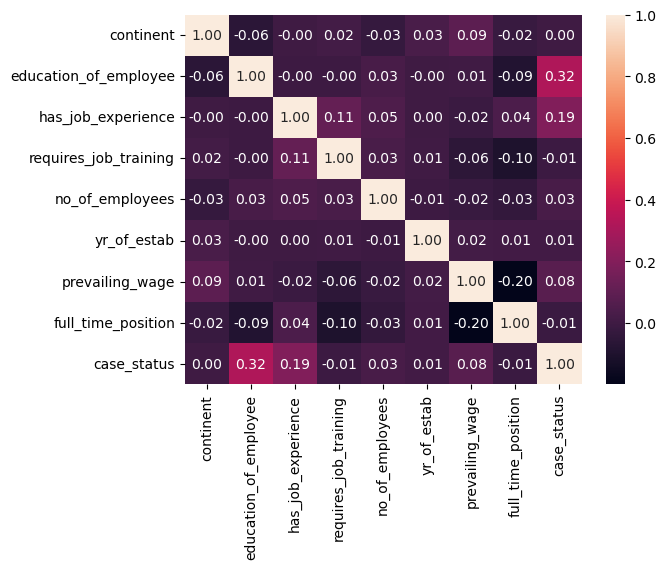

In [365]:
sns.heatmap(df.corr(numeric_only=True),annot=True,fmt=".2f")

***Observation***
- There is no much correction in the data 

In [31]:
def boxplot_histogram(data, feature , figsize=(15,10), kde=False):
    f,(ax_1,ax_2)=plt.subplots(nrows=2,sharex=True,gridspec_kw={"height_ratios": (0.25, 0.75)},figsize=figsize)
    sns.boxplot(data,x=feature,ax=ax_1,showmeans=True,color="red")
    sns.histplot(data,x=feature,ax=ax_2,kde=kde)
    ax_2.axvline(data[feature].mean(),color="red",ls="--")
    ax_2.axvline(data[feature].median(),color="black",ls="-")    

In [44]:
def labeled_barplot(data, feature, perc= True, n=None):
    """
    data :the name of the dataset
    feature:the name of the feature 
    count:number of values in the count 
    total= what number number need to show 
    """
    count= data[feature].nunique()
    total= len(data[feature])
    # if the user give the n value we will pass the n else take the nunique values
    if n is None:
        plt.figure(figsize=(count+2,6))
    else:
        plt.figure(figsize=(n+2,6))
    plt.xticks(rotation=90,fontsize=15)
    ax=sns.countplot(data,x=feature,palette="Paired",order=data[feature].value_counts().index[:n])
    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [366]:

def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

### Univariate analysis for Numerical 

***prevailing_wage*** 

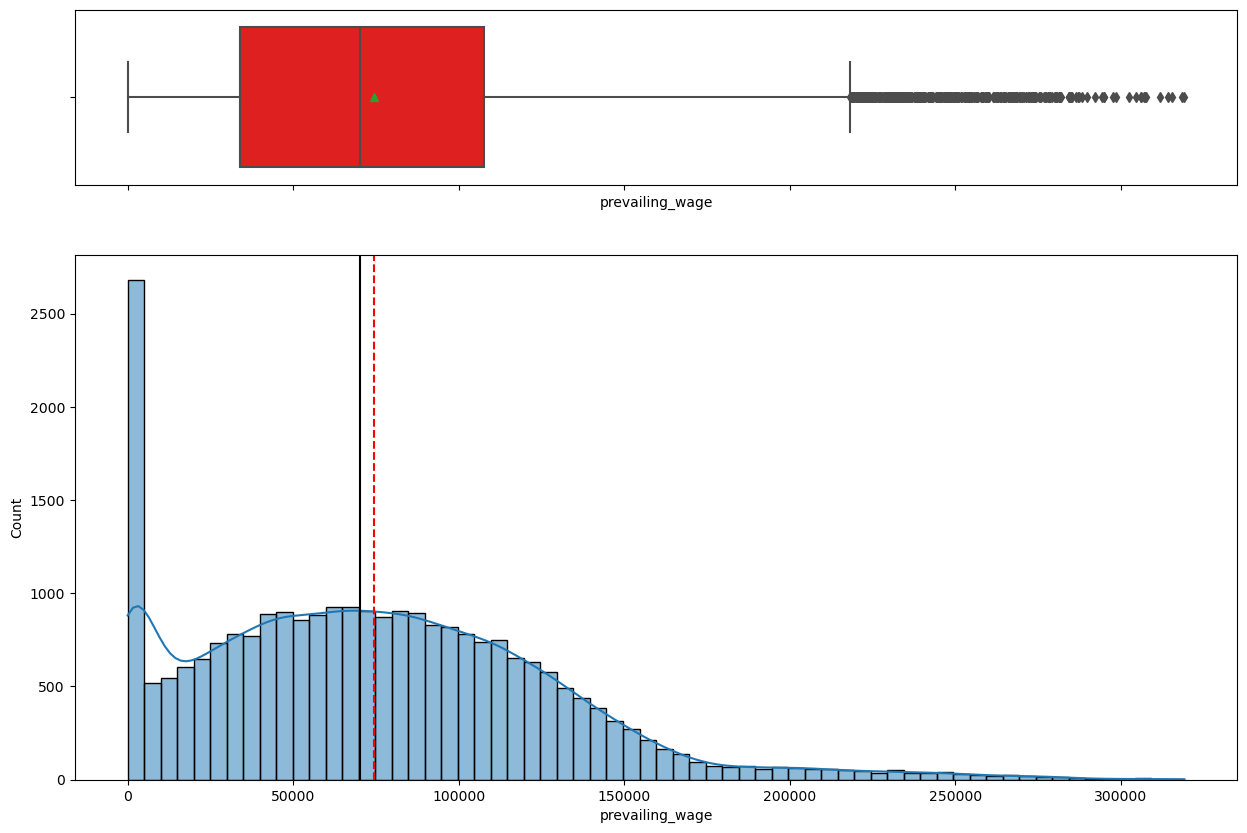

In [47]:
boxplot_histogram(df,"prevailing_wage",kde=True)

***Observation***
- `prevailing_wage` are classified as hourly monthly and yearly
- `prevailing_wage` need to do feature engineering 

***yr_of_estab***

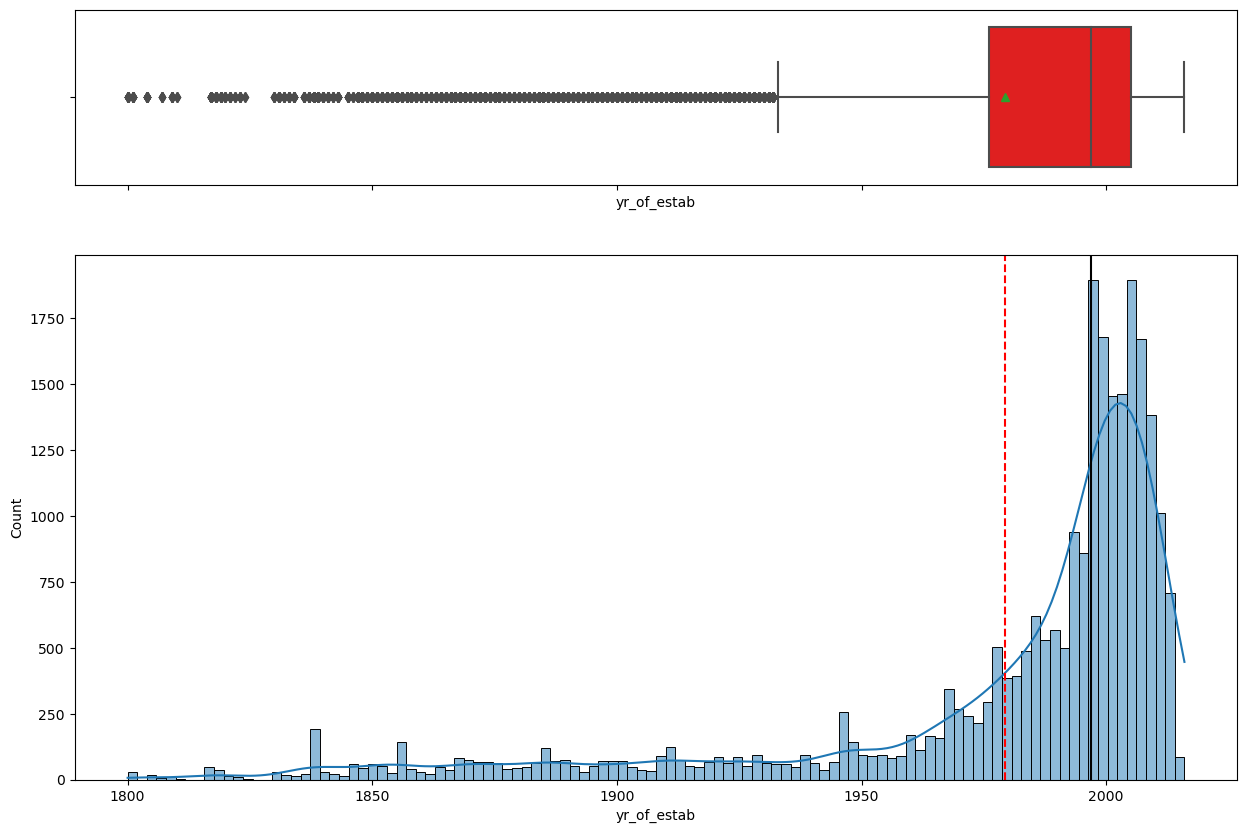

In [48]:
boxplot_histogram(df,"yr_of_estab",kde=True)

***Observation***
- `yr_of_estab` is skewed towards left, The oldest company established was 1800 
- `yr_of_estab` has huge volume is increased from 1990 to 2016, So there are huge volume of outliers at min end whiskers

***no_of_employees***
- we found ou there are negitive number of employees so we use abs which convert them into positive numbers 

In [68]:
df["no_of_employees"]=np.abs(df["no_of_employees"])

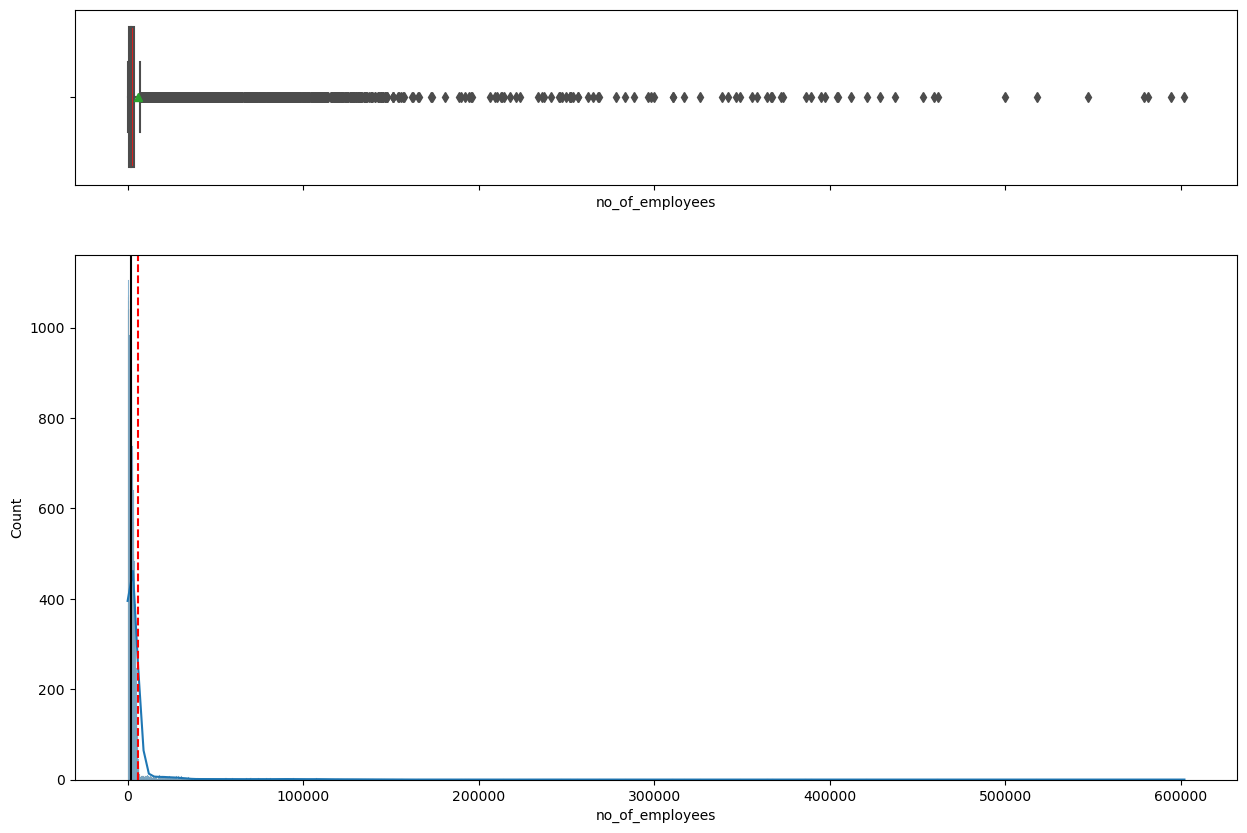

In [69]:
boxplot_histogram(df,"no_of_employees",kde=True)

***Observation***
- There are huge number of the outliers in the max side of whiskers. We can treat the ouliers 
- There is a huge volume around 10 to 500 no_of_employees

### Categorical Univariate analysis

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


***Observation***

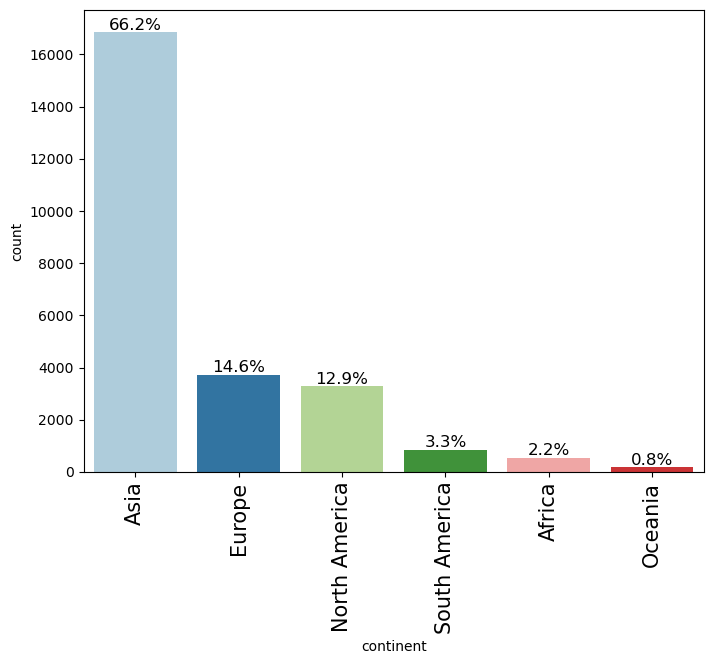

In [74]:
labeled_barplot(df,"continent",perc=True)

***Observation***
- The majority of the pople who applied for the visa are Asia with 66.2%

***education_of_employee***

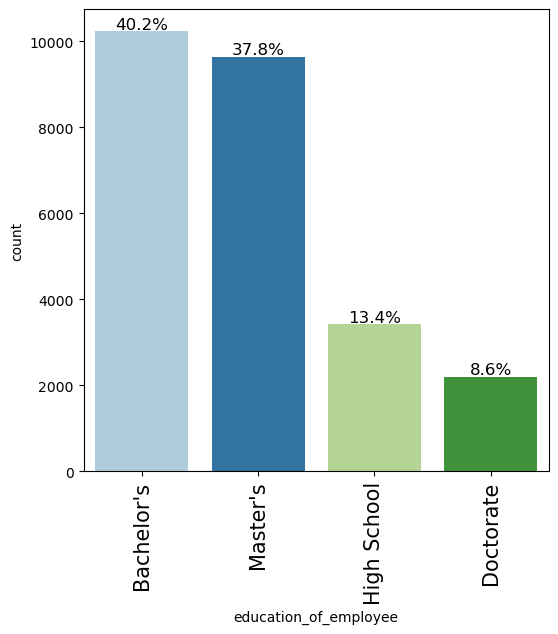

In [75]:
labeled_barplot(df,"education_of_employee",perc=True)

***Observation***
- people who completed there bachelor's and masters are highest 
- The People who completed there Doctor Degree are the least 

***has_job_experience***

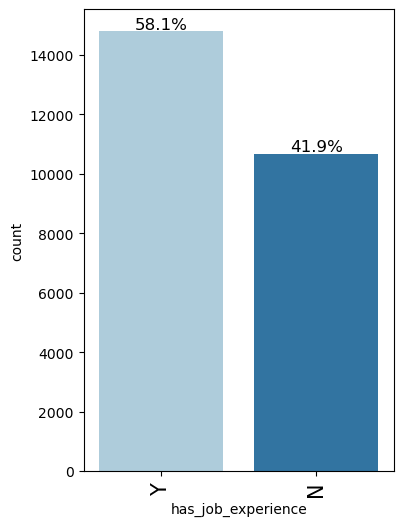

In [76]:
labeled_barplot(df,"has_job_experience",perc=True)

***Observation***
- more half percentage has_job_experience 
- This give more info with multiple combinations 

***requires_job_training***

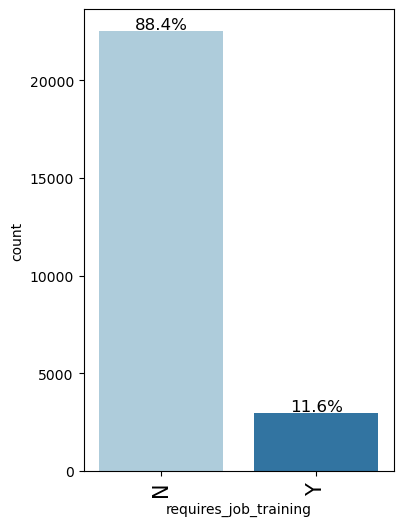

In [77]:
labeled_barplot(df,"requires_job_training",perc=True)

***Observation***
- Very few percentage requires_job_training (11.6%)
- which mean most skilled people had applied 

***region_of_employment***

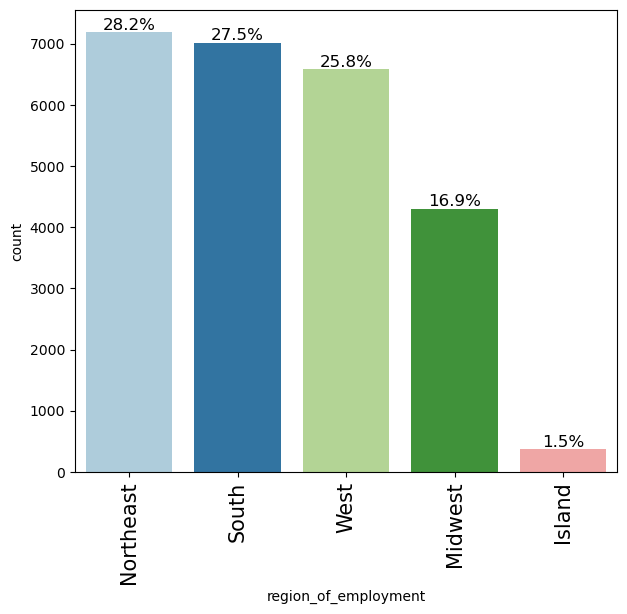

In [78]:
labeled_barplot(df,"region_of_employment",perc=True)

***Observation***
- foreign worker's intended region of employment are Northeast and south and followed by west 

***unit_of_wage***

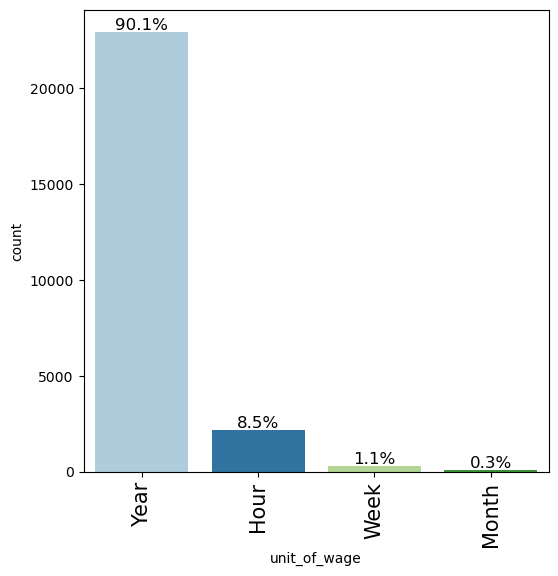

In [79]:
labeled_barplot(df,"unit_of_wage",perc=True)

***Observation***
- Max unit of payments are Yearly and followed by Hourly

***full_time_position***

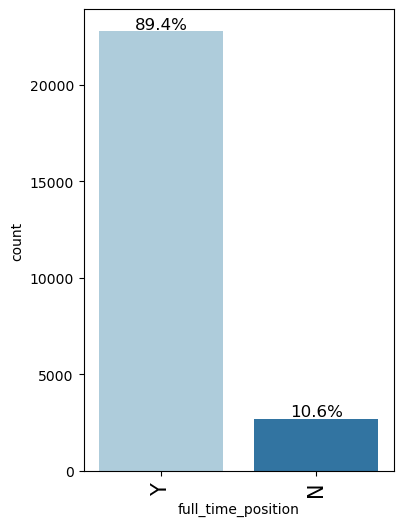

In [80]:
labeled_barplot(df,"full_time_position",perc=True)

***Observation***
- Most of the people are fulltime position 

***case_status***

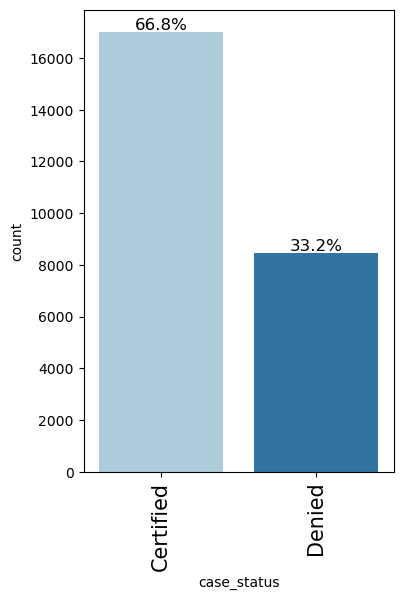

In [81]:
labeled_barplot(df,"case_status",perc=True)

***Observation***
- The Certified are highest compared to Denied 

### Bi-Variate analysis 

### Fulltime position vs case_status

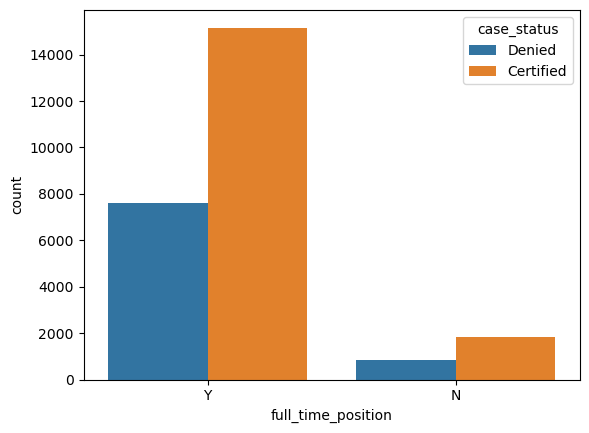

In [88]:
sns.countplot(df,x="full_time_position",hue="case_status");

***Observation***
- No of people with fulltime position got visa is higher compared to without fulltime position


### Education vs visa status 
- Those with higher education may want to travel abroad for a well-paid job. Does education play a role in Visa certification?

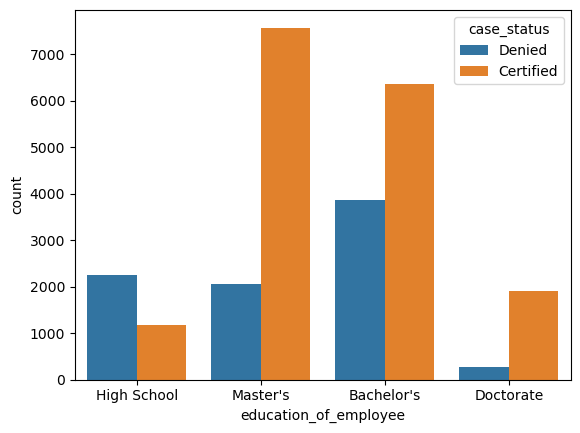

In [89]:
sns.countplot(df,x="education_of_employee",hue="case_status");

***Observation***
- There is very good relation with the eduction and visa certified 
- Doctorate the visa rejection is very less same as masters and followed by bacherl's, But the high school educted people had very good rate of rejection

### Visastatus vs continents 

2. How does the visa status vary across different continents?

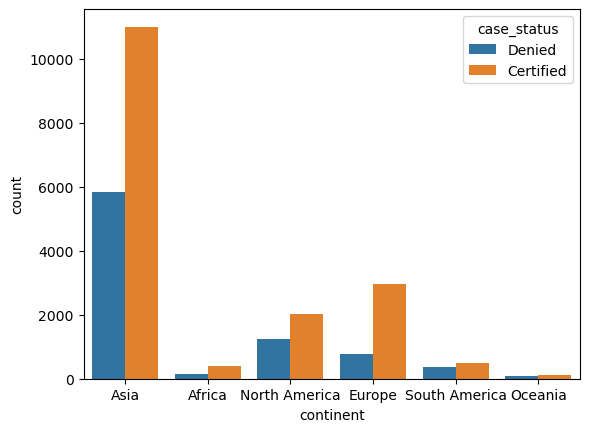

In [91]:
sns.countplot(df,x="continent",hue="case_status");

***Observation***
- There are huge number of Asia applied for the visa comparied to different continent. 
- Asian and European has higher change of visa 

### has_job_experience vs case_status
- Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status?

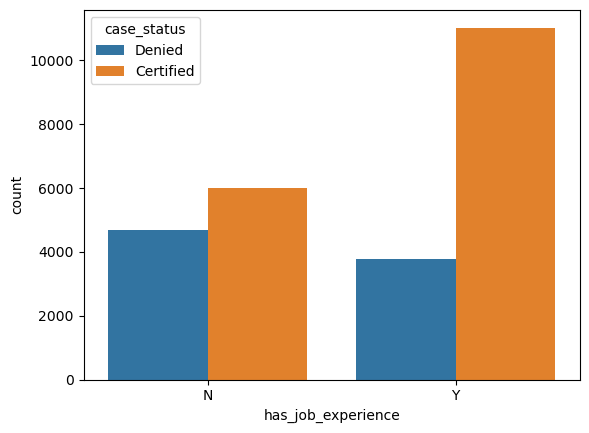

In [96]:
sns.countplot(df,x="has_job_experience",hue="case_status");

***Observation***
- People with job expreience has higher changes of getting visa than the people with the no job expereience 
- People with with out any job expreience has 50-50 change of visa approval 

### has_job_experience vs education_of_employee

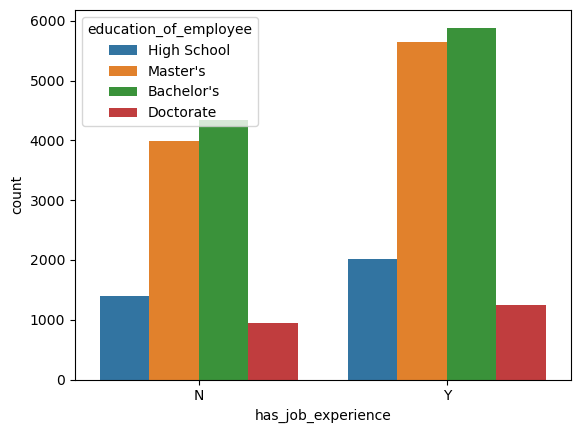

In [97]:
sns.countplot(df,x="has_job_experience",hue="education_of_employee");

### unit_of_wage vs case_status 
- In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa?

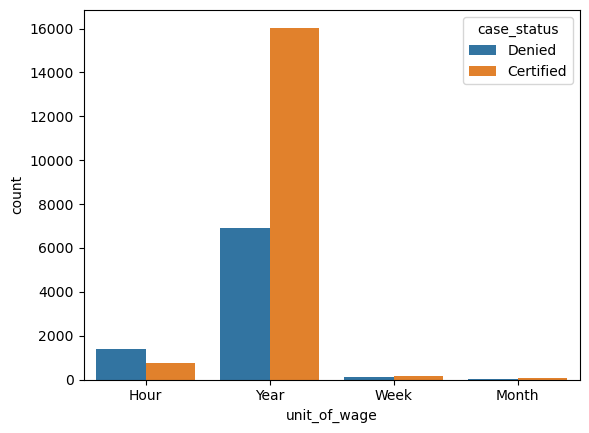

In [105]:

sns.countplot(df,x="unit_of_wage",hue="case_status");


***Observation***
- The yearly package has the higher chance of getting the visa 
- Hourly is having very less change of getting visa 

### prevailing_wage VS case_status

- The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage?

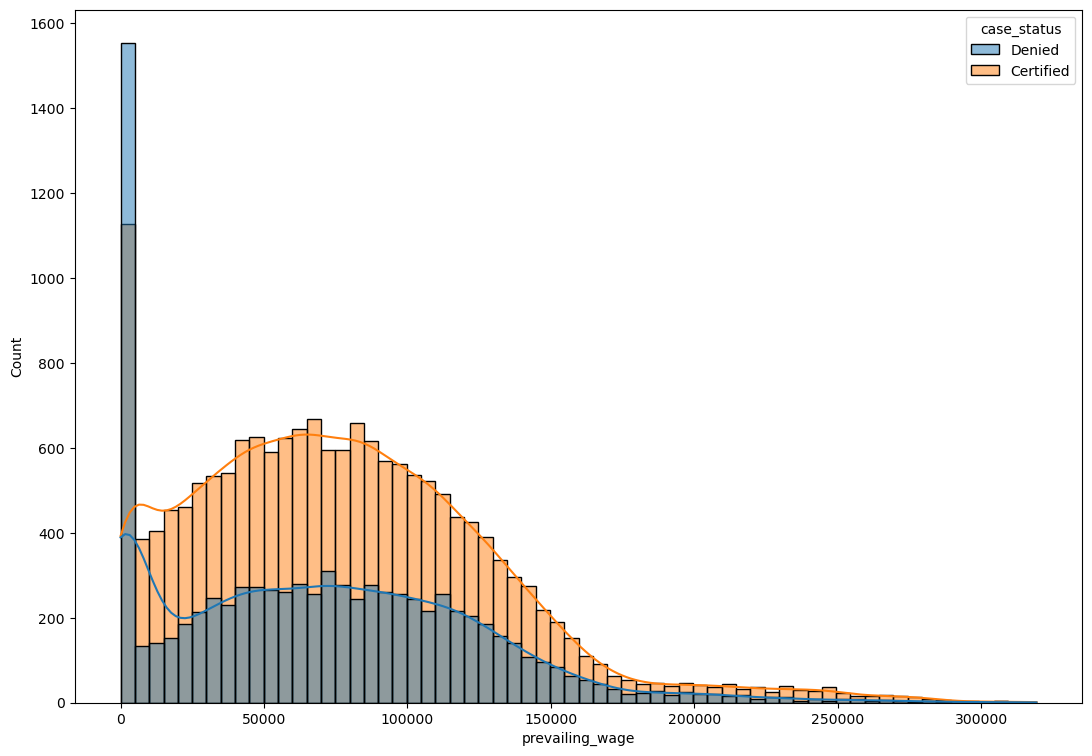

In [109]:
plt.figure(figsize=(13,9))
sns.histplot(df,x="prevailing_wage",hue="case_status",kde=True)
plt.show()

***Observation***
- The data suggest the people with less than 10000 have high chance of rejection 
- People beyound the 10000 have equal chance of picking up there visa 


## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

***Missing value treatment (if needed)***

In [113]:
df.isnull().sum()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

***Feature engineering***
- case_id is not use we can drop the value

In [115]:
df=df.drop(["case_id"],axis=1)

***Outliers Checking***

/var/folders/yf/yzblcx4n5gs18cf7p7hkhpyr0000gn/T/ipykernel_50645/4131324217.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/yf/yzblcx4n5gs18cf7p7hkhpyr0000gn/T/ipykernel_50645/4131324217.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


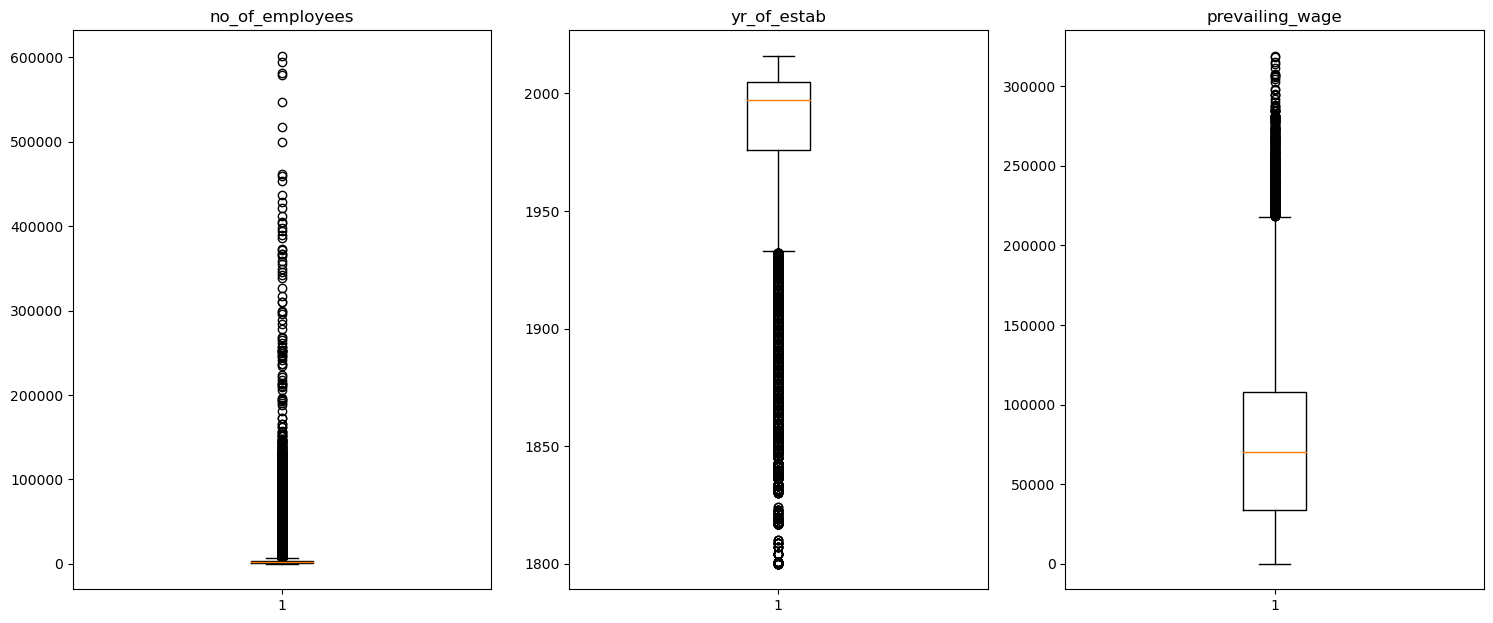

In [119]:
numerical_col = data.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(20, 30))

for i, variable in enumerate(numerical_col):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

In [133]:
# to find the 25th percentile and 75th percentile for the numerical columns.
Q1 = data[numerical_col].quantile(0.25)
Q3 = data[numerical_col].quantile(0.75)

IQR = Q3 - Q1                   #Inter Quantile Range (75th percentile - 25th percentile)

lower_whisker = Q1 - 1.5*IQR    #Finding lower and upper bounds for all values. All values outside these bounds are outliers
upper_whisker = Q3 + 1.5*IQR

In [134]:
((data[numerical_col] < lower_whisker) | (data[numerical_col] > upper_whisker)).sum()/data.shape[0]*100

no_of_employees     6.106750
yr_of_estab        12.794349
prevailing_wage     1.675824
dtype: float64

In [135]:
def treat_outliers(df, col):
    """
    treats outliers in a variable
    col: str, name of the numerical variable
    df: dataframe
    col: name of the column
    """
    Q1 = df[col].quantile(0.25)  # 25th quantile
    Q3 = df[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1                # Inter Quantile Range (75th perentile - 25th percentile)
    lower_whisker = Q1 - 1.5 * IQR
    upper_whisker = Q3 + 1.5 * IQR

    # all the values smaller than lower_whisker will be assigned the value of lower_whisker
    # all the values greater than upper_whisker will be assigned the value of upper_whisker
    # the assignment will be done by using the clip function of NumPy
    df[col] = np.clip(df[col], lower_whisker, upper_whisker)

    return df

In [136]:

df=treat_outliers(df,"no_of_employees")
df=treat_outliers(df,"yr_of_estab")
df=treat_outliers(df,"prevailing_wage")


## EDA

- It is a good idea to explore the data once again after manipulating it.

/var/folders/yf/yzblcx4n5gs18cf7p7hkhpyr0000gn/T/ipykernel_50645/4131324217.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/yf/yzblcx4n5gs18cf7p7hkhpyr0000gn/T/ipykernel_50645/4131324217.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


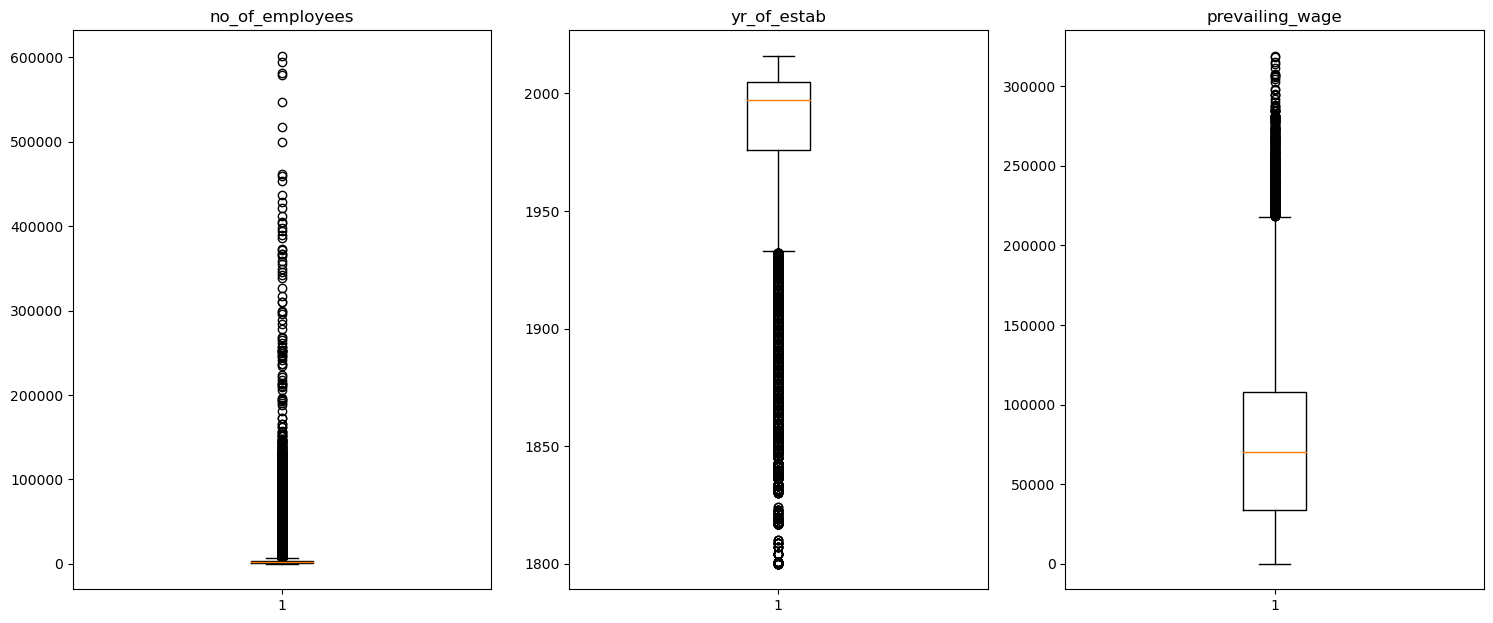

In [137]:
numerical_col = data.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(20, 30))

for i, variable in enumerate(numerical_col):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

In [138]:
cat=df.select_dtypes(include=np.object_).columns.to_list()
for i in  (cat):
    print(df[i].value_counts())
    print("***"*25)

region_of_employment
Northeast    7195
South        7017
West         6586
Midwest      4307
Island        375
Name: count, dtype: int64
***************************************************************************
unit_of_wage
Year     22962
Hour      2157
Week       272
Month       89
Name: count, dtype: int64
***************************************************************************


## Preparing data for modeling
### Converting the all the categorical to numerical values 

In [139]:
replace_value ={
    "continent":{"Oceania":1,"Africa":2,"South America":3,"North America":4,"Europe":5,"Asia":6},
    "education_of_employee":{"Bachelor's":2,"Master's":3,"High School":1,"Doctorate":4},
    "has_job_experience":{"Y":2,"N":1},
    "requires_job_training":{"Y":1,"N":2},
    "full_time_position":{"Y":2,"N":1},
    "case_status":{"Certified":1,"Denied":0}
}

In [140]:
df=df.replace(replace_value)

In [142]:
X=df.drop("case_status",axis=1)
Y=df["case_status"]

In [144]:
X=pd.get_dummies(X,columns=["unit_of_wage","region_of_employment"],dtype=float)

### Train Test split the data 

In [153]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.30,random_state=1,stratify=Y)

### Shape of test and train 

In [154]:
x_train.shape,x_test.shape

((17836, 17), (7644, 17))

***Observation***
- The 17836 observation in train and 7644 in the test

### Model Performance Evaluation¶
- Model can make wrong predictions as:

- Predicting a candidate got rejected  but in reality the candidate did not rejected.(FP)

- Predicting a candidate did not  rejected but in reality the candidate got rejected.(FN)

***Which case is more important?***

* We need to reduce both False Negatives and False Positives



### Define a Function for Calssification score and the confution matrix for train and test result 

In [179]:
def check_model_performance(model,predictor,target):
    #we need the accuracy, recall , precision score 
    y_predict=model.predict(predictor)
    recall=metrics.recall_score(target,y_predict)
    accuracy=metrics.accuracy_score(target,y_predict)
    precision=metrics.precision_score(target,y_predict)
    f1= metrics.f1_score(target,y_predict)
    score_value=pd.DataFrame({
        "recall":recall,
        "accuracy":accuracy,
        "precision":precision,
        "f1_score":f1,
    },index=[0])
    return score_value

In [180]:
def checking_confution_matrix(model,predictor,target):
    #confution metrix takes 2 parameters 
    y_predict = model.predict(predictor)
    cm=confusion_matrix(target,y_predict)
    label= np.asarray([
        ["{0:0.0f}".format(item) + "\n{0:0.2%}".format(item/cm.flatten().sum())]
        for item in cm.flatten()
    ]).reshape(2,2)
    sns.heatmap(cm,annot=label,fmt="")
    plt.ylabel("Actual_values")
    plt.xlabel("Predicted_values")
    plt.title("Confusion Matrix")

## Building bagging and boosting models

### Starting with the Bagging model without the parameter and then we will add the hyper parameter 

#### Decision Tree 

In [171]:
Dtree = DecisionTreeClassifier(random_state=1,class_weight="balanced")
Dtree.fit(x_train,y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=1)

In [172]:
Dtree_train=check_model_performance(Dtree,x_train,y_train)
Dtree_train

,recall,accuracy,precision,f1_score
0,1.0,1.0,1.0,1.0


In [173]:
Dtree_test=check_model_performance(Dtree,x_test,y_test)
Dtree_test

,recall,accuracy,precision,f1_score
0,0.733399,0.647043,0.736863,0.735127


***Observation***
- The Decision Tree classifier score values for the train and test have huge difference it is over fit 
- It seems It captured more noise rether than the patteren. Which lead to poor results 

### Let check the Confusion matrix 

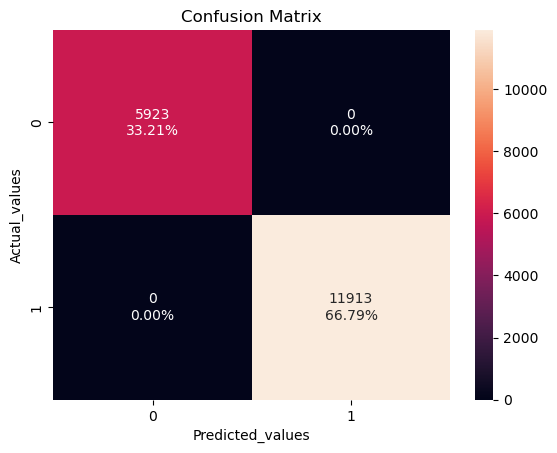

In [176]:
checking_confution_matrix(Dtree,x_train,y_train)

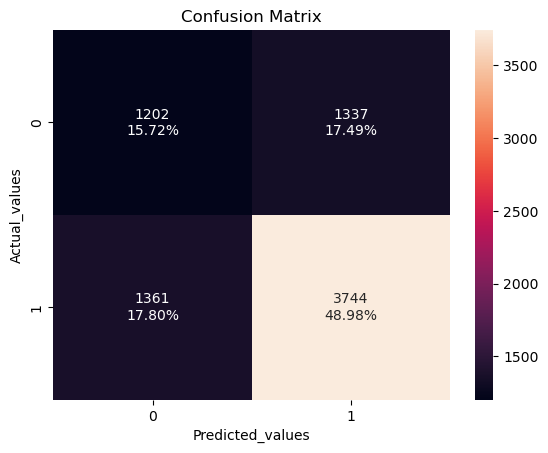

In [178]:
checking_confution_matrix(Dtree,x_test,y_test)

***Observation***

- In the train the FP and FN are zero but in the test both os them had 17 % 
- This mean the model captured more noise and overfitted 

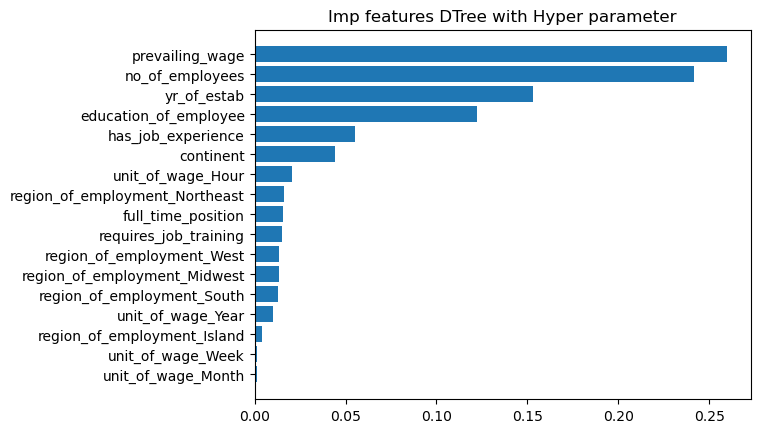

In [322]:
feature_important=x_train.columns.to_list()
important = Dtree.feature_importances_
indecies=np.argsort(important)
plt.barh(range(len(indecies)),important[indecies]);
plt.yticks(range(len(indecies)),[feature_name[i] for i in indecies]);
plt.title("Imp features DTree with Hyper parameter");

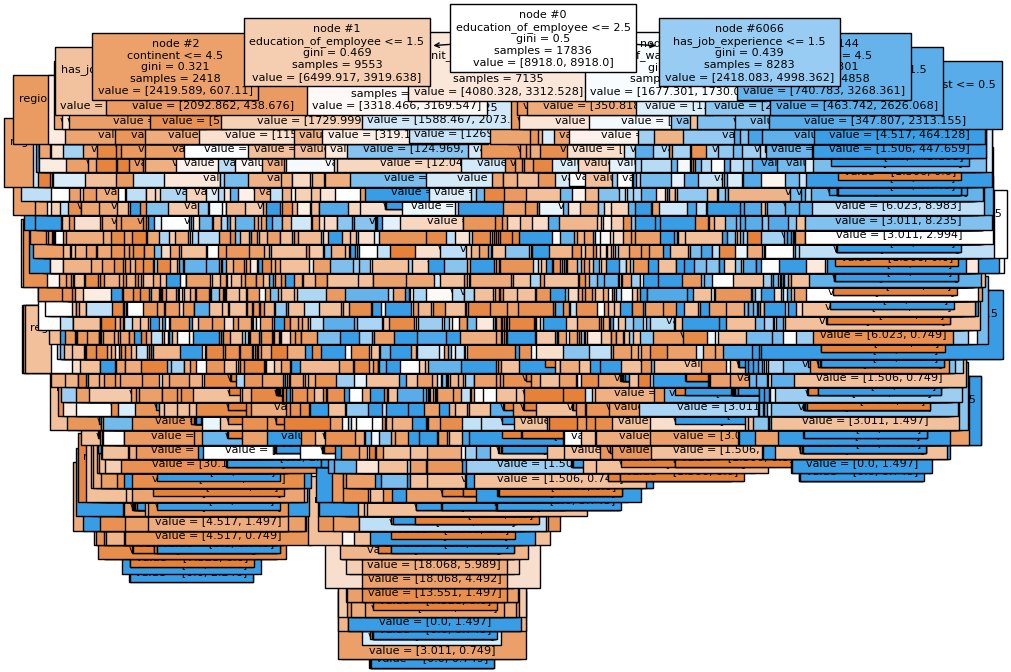

In [323]:
feature_name=x_train.columns.to_list()
plt.figure(figsize=(10,8))
tree.plot_tree(Dtree,feature_names=feature_name,node_ids=True,impurity=True,fontsize=8,filled=True);

### Desicion Tree with Parameters 

In [192]:
Dtree_estimator =DecisionTreeClassifier(random_state=1,class_weight="balanced")
Dtree_parameters={
    "max_depth":np.arange(2,10,2),
    "min_samples_split":[3,6,9,10,15],
    "min_samples_leaf":[1,3,5,7,8,9],
    "min_impurity_decrease":[0.001,0.01,0.1],
    "max_leaf_nodes":[7,10,12,18]
}
ssc_score=metrics.make_scorer(metrics.f1_score)
grid_obj= GridSearchCV(Dtree_estimator,Dtree_parameters,scoring=ssc_score,cv=5,n_jobs=-1)
grid_obj.fit(x_train,y_train)
Dtree_estimator=grid_obj.best_estimator_
Dtree_estimator.fit(x_train,y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=4, max_leaf_nodes=7,
                       min_impurity_decrease=0.001, min_samples_split=3,
                       random_state=1)

In [193]:
Dtree_estimator_train=check_model_performance(Dtree_estimator,x_train,y_train)
Dtree_estimator_train

,recall,accuracy,precision,f1_score
0,0.779569,0.716641,0.792744,0.786101


In [194]:
Dtree_estimator_test=check_model_performance(Dtree_estimator,x_test,y_test)
Dtree_estimator_test

,recall,accuracy,precision,f1_score
0,0.78237,0.715594,0.789796,0.786066


***Observation***
- The Scores for train and test are very close 

***Disadvantages of the Decision Tree***
- The Decision Tree is a single Tree with weeek learner which means single tree with single Decision 

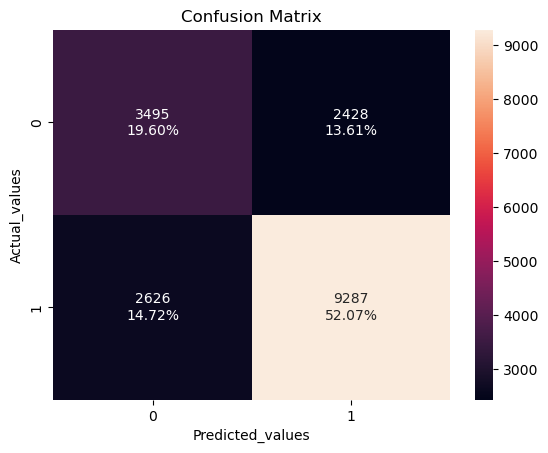

In [195]:
checking_confution_matrix(Dtree_estimator,x_train,y_train)

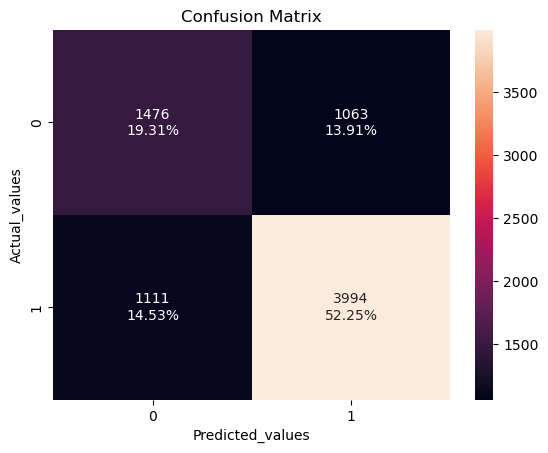

In [196]:
checking_confution_matrix(Dtree_estimator,x_test,y_test)

### checking the Tree and the important features

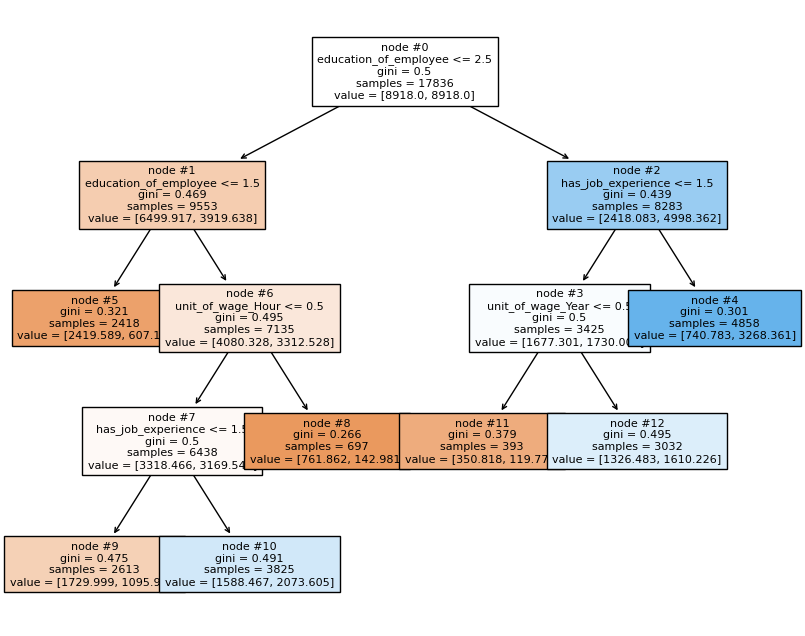

In [204]:
feature_name=x_train.columns.to_list()
plt.figure(figsize=(10,8))
tree.plot_tree(Dtree_estimator,feature_names=feature_name,node_ids=True,impurity=True,fontsize=8,filled=True);

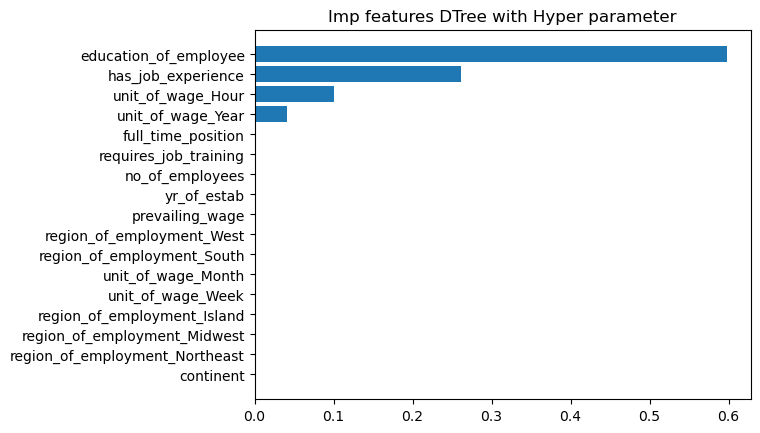

In [209]:
feature_important=x_train.columns.to_list()
important = Dtree_estimator.feature_importances_
indecies=np.argsort(important)
plt.barh(range(len(indecies)),important[indecies]);
plt.yticks(range(len(indecies)),[feature_name[i] for i in indecies]);
plt.title("Imp features DTree with Hyper parameter");

***Observation***
- Overall we got good score Dtree estimator 
- This is a single Tree we will go with feature model and see what are there score and will compare these 

#### Bagging 
- first without the hyperparameters
- second with hyperparameters

In [224]:
bagging_model=BaggingClassifier(random_state=1,estimator=DecisionTreeClassifier(random_state=1,class_weight="balanced"))
bagging_model.fit(x_train,y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(class_weight='balanced',
                                                   random_state=1),
                  random_state=1)

In [225]:
bagging_model_train=check_model_performance(bagging_model,x_train,y_train)
bagging_model_train

,recall,accuracy,precision,f1_score
0,0.985814,0.984357,0.99072,0.988261


In [226]:
bagging_model_test=check_model_performance(bagging_model,x_test,y_test)
bagging_model_test

,recall,accuracy,precision,f1_score
0,0.781587,0.700026,0.772059,0.776794


***Observation***
- The model has more nise and it is overfitted 
- The scores from the test and train are not comparable

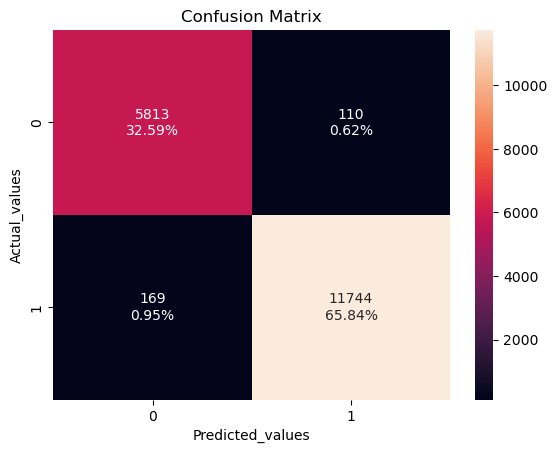

In [227]:
checking_confution_matrix(bagging_model,x_train,y_train)

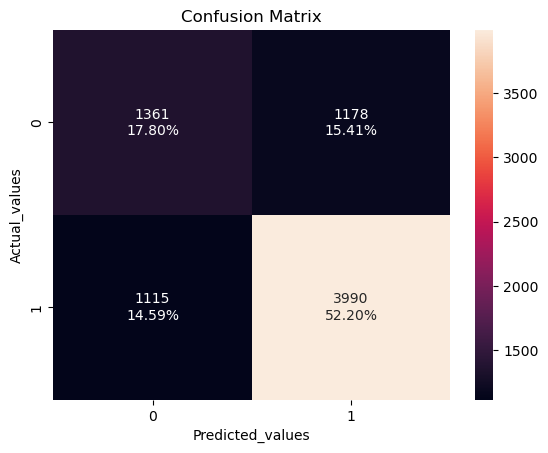

In [228]:
checking_confution_matrix(bagging_model,x_test,y_test)

***Observation*** 
- The detection of the FP and FN are increased comparing the test and train
- TP also reduced, which is because of Noise in the data 

### Bagging with Hyper-Parameters

In [229]:
Bagging_estimator=BaggingClassifier(random_state=1,estimator=DecisionTreeClassifier(class_weight="balanced",random_state=1))
Bagging_parameters={
    "n_estimators":np.arange(10,90,10),
    "max_samples":np.arange(3,10,1),
    "max_features":np.arange(0.1,0.9,0.1),  
}
ssc_score=metrics.make_scorer(metrics.f1_score)
Bagging_Grid_obj=GridSearchCV(Bagging_estimator,Bagging_parameters,scoring=ssc_score,cv=5,n_jobs=-1)
Bagging_Grid_obj.fit(x_train,y_train)
Bagging_estimator=Bagging_Grid_obj.best_estimator_
Bagging_estimator.fit(x_train,y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(class_weight='balanced',
                                                   random_state=1),
                  max_features=0.8, max_samples=8, n_estimators=80,
                  random_state=1)

In [230]:
Bagging_estimator_train=check_model_performance(Bagging_estimator,x_train,y_train)
Bagging_estimator_train

,recall,accuracy,precision,f1_score
0,0.999245,0.668367,0.668389,0.800996


In [231]:
Bagging_estimator_test=check_model_performance(Bagging_estimator,x_test,y_test)
Bagging_estimator_test

,recall,accuracy,precision,f1_score
0,0.999804,0.668367,0.668238,0.801067


***observation***
- The Accuracy score is decreased but the recall and f1_score has increased 
- Bagging_estimator model had more bias to recall than accuracy and precision 

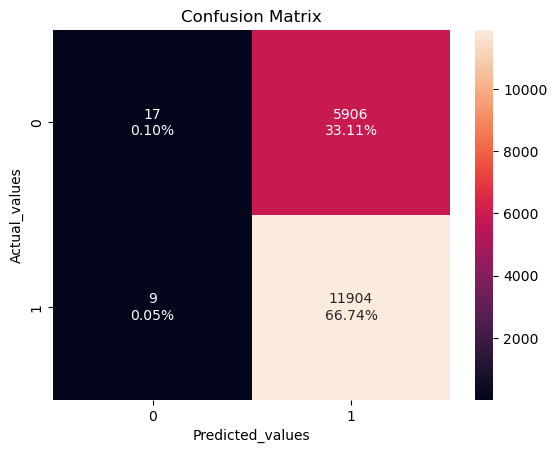

In [232]:
checking_confution_matrix(Bagging_estimator,x_train,y_train)

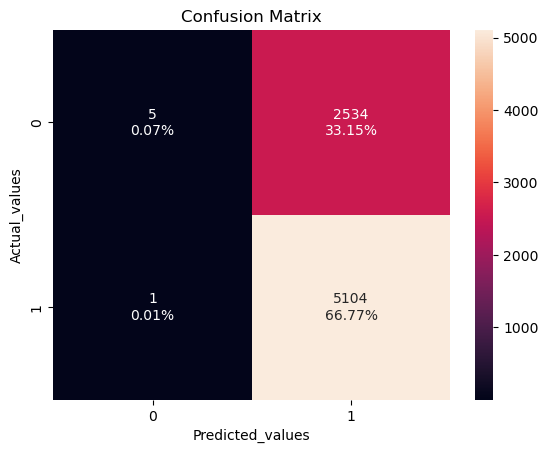

In [233]:
checking_confution_matrix(Bagging_estimator,x_test,y_test)

***Observation***
- The Predicting the denied is very close to zero and TN are nearly zero this is not properly distrubuted 

### Random Forest 

- First with out hyper parameters 
- Secound with hyper parameter 

In [211]:
rf_model= RandomForestClassifier(random_state=1,class_weight="balanced")
rf_model.fit(x_train,y_train)

RandomForestClassifier(class_weight='balanced', random_state=1)

In [212]:
rf_model_train=check_model_performance(rf_model,x_train,y_train)
rf_model_train

,recall,accuracy,precision,f1_score
0,1.0,1.0,1.0,1.0


In [213]:
rf_model_test=check_model_performance(rf_model,x_test,y_test)
rf_model_test

,recall,accuracy,precision,f1_score
0,0.848384,0.724359,0.764654,0.804346


***Observation***
- The model score for the test and train have much difference which lead to overfitting of the data 
- The model trained more noise 

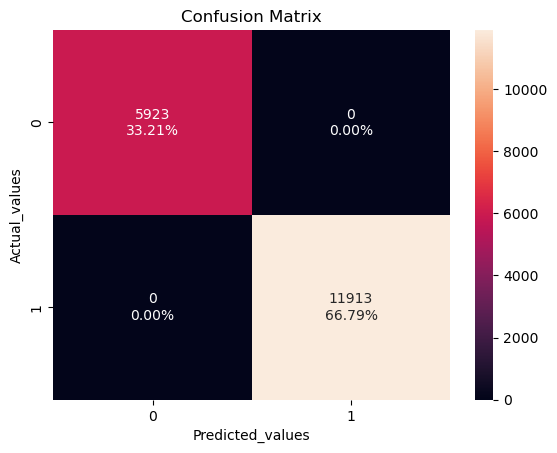

In [214]:
checking_confution_matrix(rf_model,x_train,y_train)

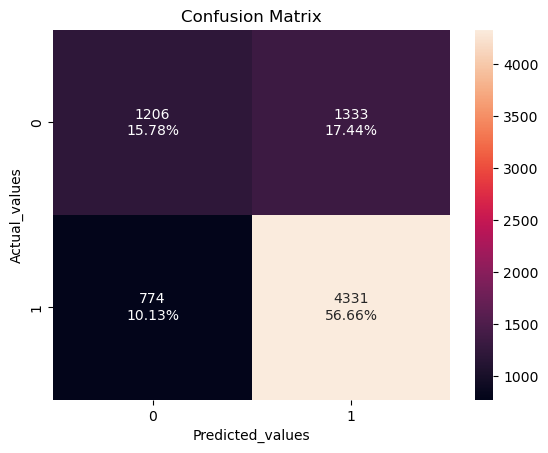

In [215]:
checking_confution_matrix(rf_model,x_test,y_test)

***Observation***
- As per the model score the confustion matrix has given the similar score
- Due to over fitting of the data. The score in train are testing had much difference.

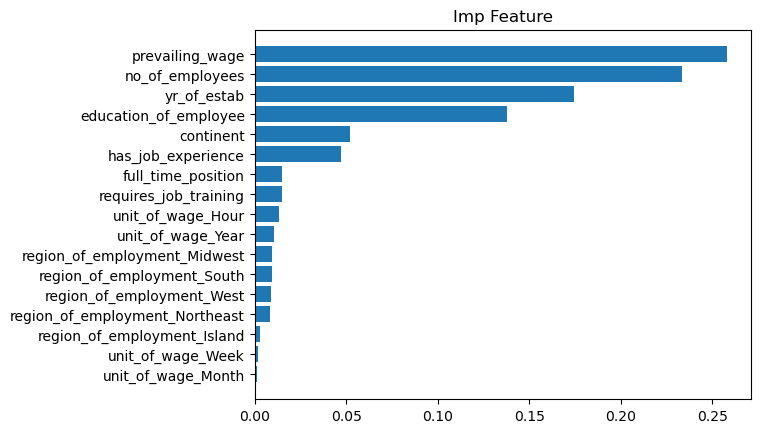

In [315]:
feature_name=x_train.columns.to_list()
important=rf_model.feature_importances_
indecies=np.argsort(important)
plt.barh(range(len(indecies)),important[indecies])
plt.yticks(range(len(indecies)),[feature_name[i] for i in indecies]);
plt.title("Imp Feature");

### Random Forest With Hyper- Parameter

In [249]:
rf_estimator=RandomForestClassifier(random_state=1,class_weight="balanced")
rf_parameters={
    "max_depth":np.arange(2,14,2),
    "min_samples_split":[2,7,8,9,10],
    "n_estimators":np.arange(80,200,20),
    "min_impurity_decrease":[0.001,0.01,0.1],
    "max_leaf_nodes":[4,6,8,10],
}
ssc_score=metrics.make_scorer(metrics.f1_score)
rf_grid_obj=GridSearchCV(rf_estimator,rf_parameters,scoring=ssc_score,cv=5,n_jobs=-1)
rf_grid_obj.fit(x_train,y_train)
rf_estimator_1=rf_grid_obj.best_estimator_
rf_estimator_1.fit(x_train,y_train)

RandomForestClassifier(class_weight='balanced', max_depth=6, max_leaf_nodes=8,
                       min_impurity_decrease=0.001, n_estimators=80,
                       random_state=1)

In [251]:
rf_estimator_train=check_model_performance(rf_estimator_1,x_train,y_train)
rf_estimator_train

,recall,accuracy,precision,f1_score
0,0.763032,0.710866,0.795693,0.77902


In [250]:
rf_estimator_test=check_model_performance(rf_estimator_1,x_test,y_test)
rf_estimator_test

,recall,accuracy,precision,f1_score
0,0.765132,0.71023,0.79358,0.779096


***Observation***
- The Random forest with the hyper parameter the score close to train
- This shows the model doen't have any over-fit or the noise and well trained 

### Confused matrix for Random Forest

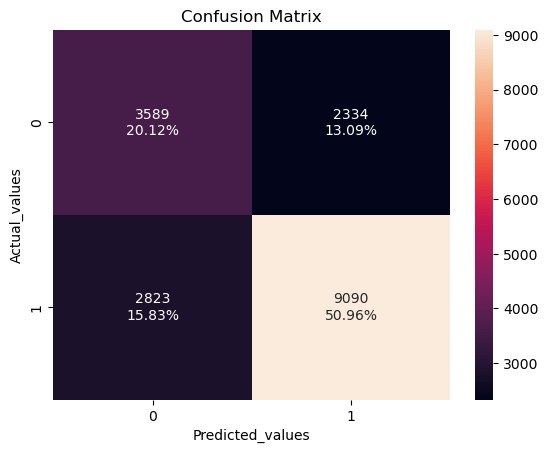

In [252]:
checking_confution_matrix(rf_estimator_1,x_train,y_train)

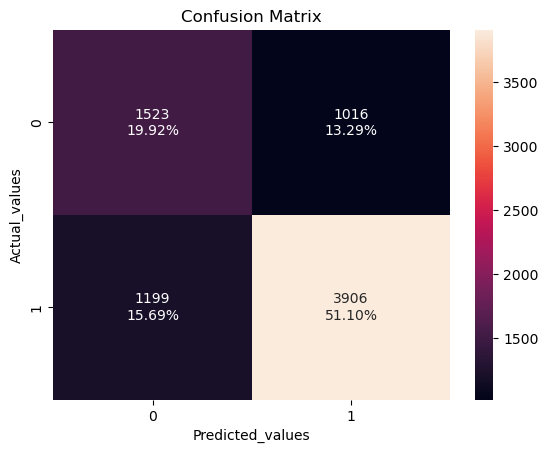

In [253]:
checking_confution_matrix(rf_estimator_1,x_test,y_test)

***Observation***
- The random forest take huge time with hyperparameters 
- It avoided the overfitting and noice
- Random forest models use a lot of memory.
- Using a large number of trees to make more accurate predictions can make the algorithm too slow for real-time prediction

### Important feature 

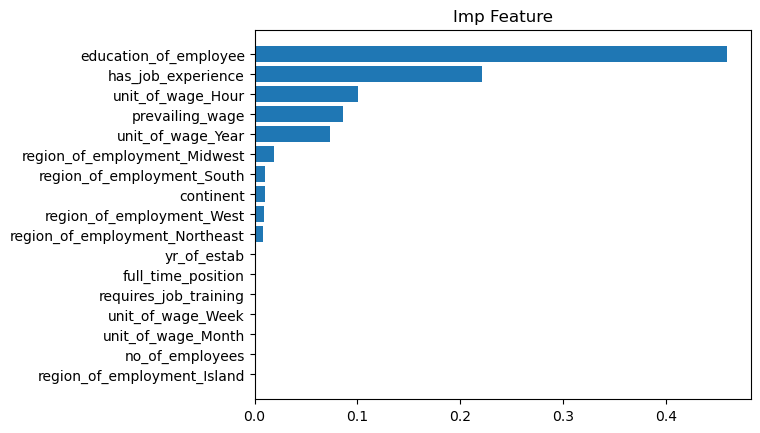

In [254]:
feature_name=x_train.columns.to_list()
important=rf_estimator_1.feature_importances_
indecies=np.argsort(important)
plt.barh(range(len(indecies)),important[indecies])
plt.yticks(range(len(indecies)),[feature_name[i] for i in indecies]);
plt.title("Imp Feature");

### Boosting
- ***AdaBoosting***
- ***GradientBoosting***
- ***XgBoosting***
- There are 3 Type of Boosting 

### AdaBoosting

In [236]:
ada_model = AdaBoostClassifier(random_state=1,estimator=RandomForestClassifier(random_state=1,class_weight="balanced"))
ada_model.fit(x_train,y_train)

AdaBoostClassifier(estimator=RandomForestClassifier(class_weight='balanced',
                                                    random_state=1),
                   random_state=1)

In [237]:
ada_model_train=check_model_performance(ada_model,x_train,y_train)
ada_model_train

,recall,accuracy,precision,f1_score
0,1.0,1.0,1.0,1.0


In [238]:
ada_model_test=check_model_performance(ada_model,x_test,y_test)
ada_model_test

,recall,accuracy,precision,f1_score
0,0.844466,0.722266,0.764362,0.80242


***Observation***
- The score for the adaBoosting with out the Hyperparamter are overfitting 


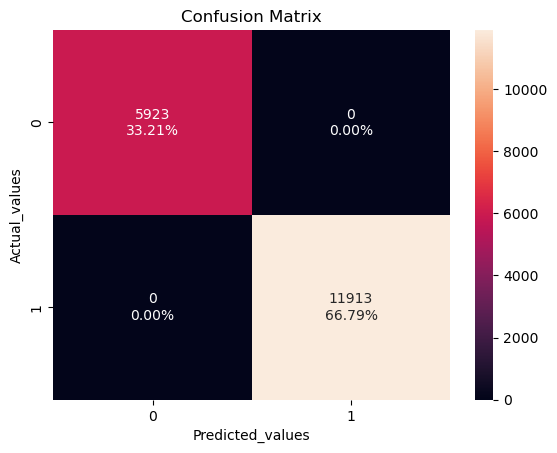

In [263]:
checking_confution_matrix(ada_model,x_train,y_train)

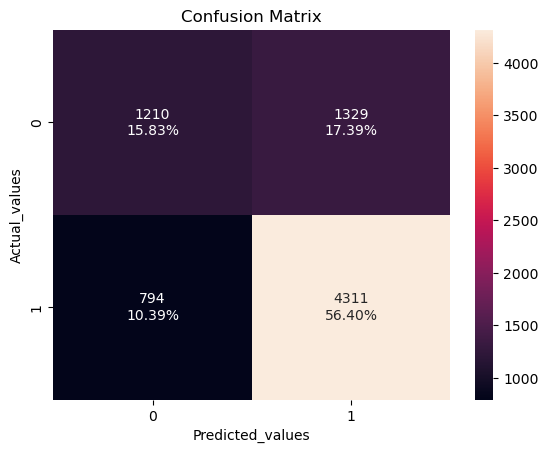

In [264]:
checking_confution_matrix(ada_model,x_test,y_test)

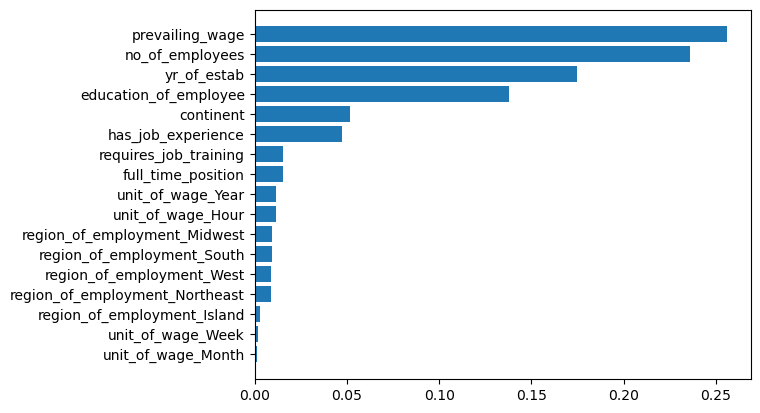

In [314]:
feature_name=x_train.columns.to_list()
importance =ada_model.feature_importances_
ada_indecies=np.argsort(importance)
plt.barh(range(len(ada_indecies)),importance[ada_indecies])
plt.yticks(range(len(ada_indecies)),[feature_name[i] for i in ada_indecies]);

### AdaBoost with Hyper- parameter 

In [262]:
ada_estimator= AdaBoostClassifier(random_state=1)
ada_parameter={
     "n_estimators":[50,70,80,100],
    "learning_rate":[1.0,0.9,0.04,0.5],
    "estimator": [
        DecisionTreeClassifier(max_depth=2, random_state=1,class_weight="balanced"),
        DecisionTreeClassifier(max_depth=3, random_state=1,class_weight="balanced"),
    ],
}
ssc_score=metrics.make_scorer(metrics.f1_score)
Ada_Grid_obj=GridSearchCV(ada_estimator,ada_parameter,scoring=ssc_score,cv=5,n_jobs=-1)
Ada_Grid_obj.fit(x_train,y_train)
Ada_estimator_best=Ada_Grid_obj.best_estimator_
Ada_estimator_best.fit(x_train,y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(class_weight='balanced',
                                                    max_depth=2,
                                                    random_state=1),
                   learning_rate=0.04, random_state=1)

In [265]:
Ada_estimator_best_train=check_model_performance(Ada_estimator_best,x_train,y_train)
Ada_estimator_best_train

,recall,accuracy,precision,f1_score
0,0.778813,0.716528,0.793059,0.785872


In [266]:
Ada_estimator_best_test=check_model_performance(Ada_estimator_best,x_test,y_test)
Ada_estimator_best_test

,recall,accuracy,precision,f1_score
0,0.780215,0.714547,0.789808,0.784982


***Observation***
- The score's did pretty good and the recall have done great in test 

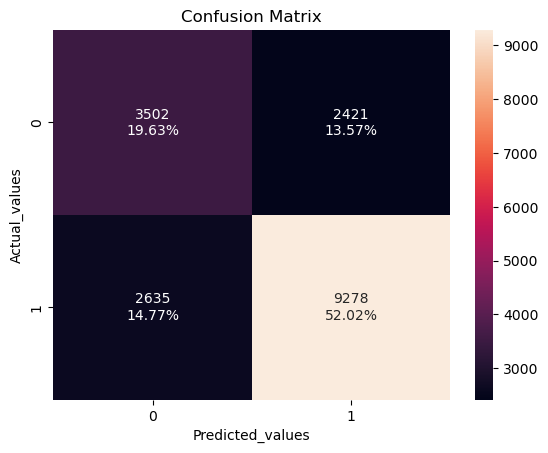

In [267]:
checking_confution_matrix(Ada_estimator_best,x_train,y_train)

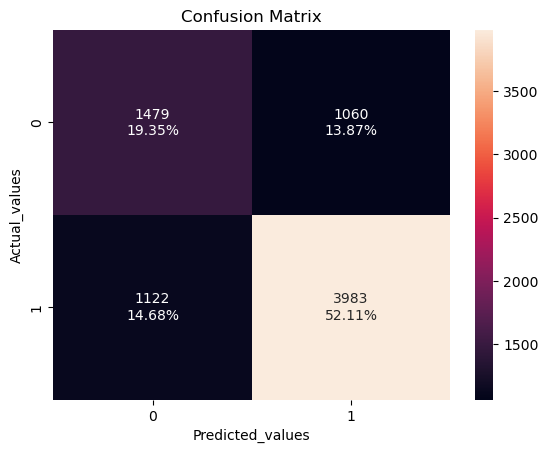

In [268]:
checking_confution_matrix(Ada_estimator_best,x_test,y_test)

***Observation***
- The Ada boost have correctly predicted the FN,FP and the score for the training and testing are comparable.
- The 52.11 are visa approved 

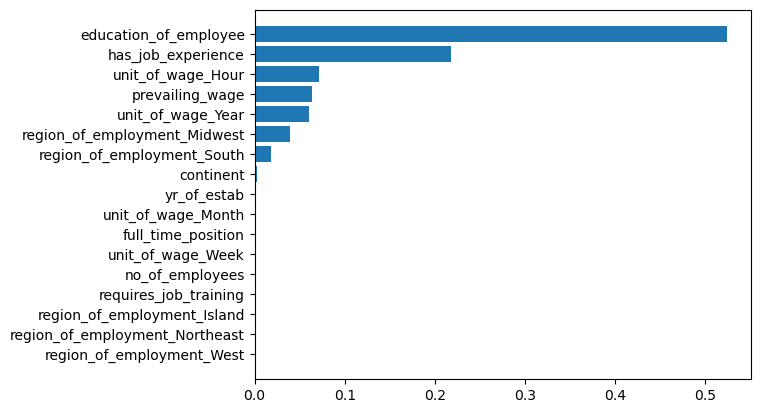

In [272]:
feature_name=x_train.columns.to_list()
importance =Ada_estimator_best.feature_importances_
ada_indecies=np.argsort(importance)
plt.barh(range(len(ada_indecies)),importance[ada_indecies])
plt.yticks(range(len(ada_indecies)),[feature_name[i] for i in ada_indecies]);

***Observation***
- The feature compared to Random forest to adaboost they are reduced 

### Gradient Boosting 
- Building week sequential model into a single, more accurate predictive model.

In [273]:
gb_model=GradientBoostingClassifier(random_state=1,init=AdaBoostClassifier(random_state=1))
gb_model.fit(x_train,y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           random_state=1)

In [274]:
gb_model_train=check_model_performance(gb_model,x_train,y_train)
gb_model_train

,recall,accuracy,precision,f1_score
0,0.886846,0.757569,0.780223,0.830125


In [275]:
gb_model_test=check_model_performance(gb_model,x_test,y_test)
gb_model_test

,recall,accuracy,precision,f1_score
0,0.880509,0.745421,0.77088,0.822056


***Observation***
- The model performed petty good. The scores are pretty close for the train and test results 
- The model had not encounted the noise or the overfit or the underfit. 

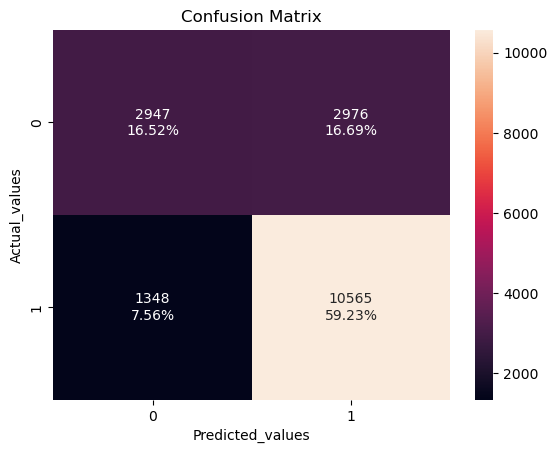

In [276]:
checking_confution_matrix(gb_model,x_train,y_train)

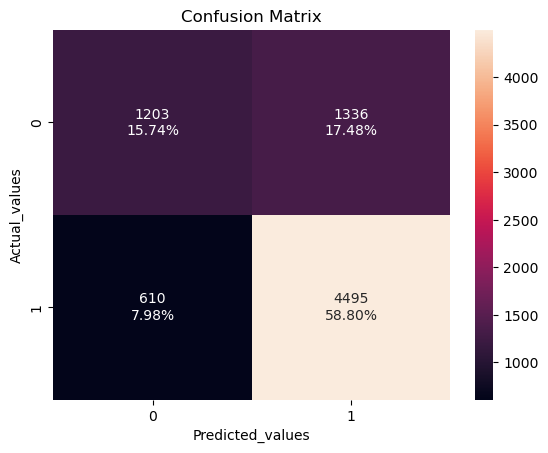

In [277]:
checking_confution_matrix(gb_model,x_test,y_test)

***Observation***
- The FN and THE FP are in 7.98% and 17.48% 
- With the Hyper parameter we will try to reduce the FP and FN

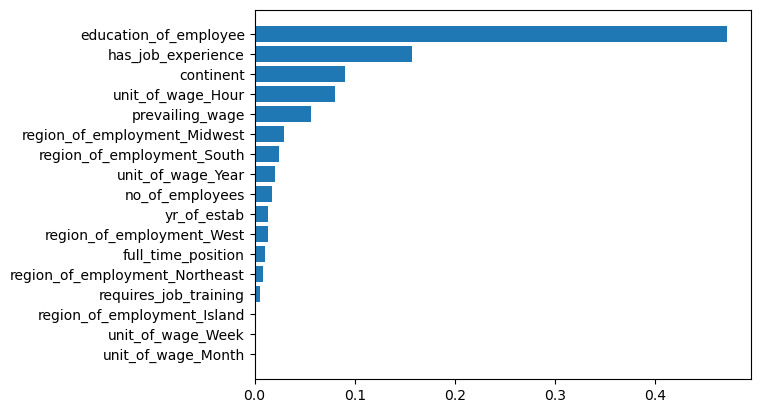

In [313]:
feature_name=x_train.columns.to_list()
importance =gb_model.feature_importances_
ada_indecies=np.argsort(importance)
plt.barh(range(len(ada_indecies)),importance[ada_indecies])
plt.yticks(range(len(ada_indecies)),[feature_name[i] for i in ada_indecies]);

### Gradient-Boosting with hyper-parameter

In [290]:
gb_estimator= GradientBoostingClassifier(random_state=1)
gb_parameters={
     "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1,class_weight="balanced")],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "subsample":[0.7,0.9],
    "max_features":[0.5,0.7,1],
}
ssc_score=metrics.make_scorer(metrics.f1_score)
gb_Grid_obj=GridSearchCV(gb_estimator,gb_parameters,scoring=ssc_score,cv=5,n_jobs=-1)
gb_Grid_obj.fit(x_train,y_train)
gb_estimator_best=gb_Grid_obj.best_estimator_
gb_estimator_best.fit(x_train,y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.5, n_estimators=50, random_state=1,
                           subsample=0.9)

In [292]:
gb_estimator_train=check_model_performance(gb_estimator_best,x_train,y_train)
gb_estimator_train

,recall,accuracy,precision,f1_score
0,0.884076,0.753981,0.777901,0.827597


In [293]:
gb_estimator_test=check_model_performance(gb_estimator_best,x_test,y_test)
gb_estimator_test

,recall,accuracy,precision,f1_score
0,0.877963,0.743982,0.770633,0.820804


***Observation***
- The well fit data with good overall score but recall and precision score reduced 

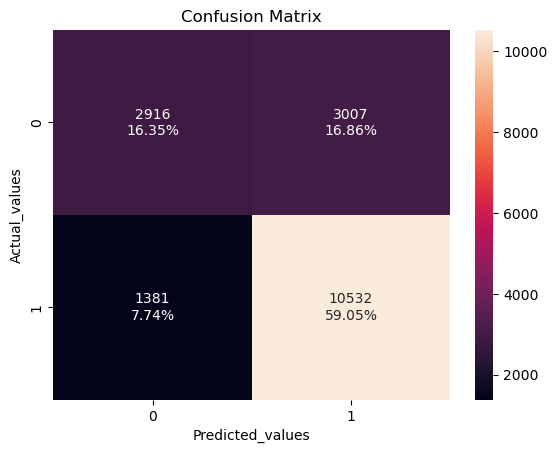

In [286]:
checking_confution_matrix(gb_estimator_best,x_train,y_train)

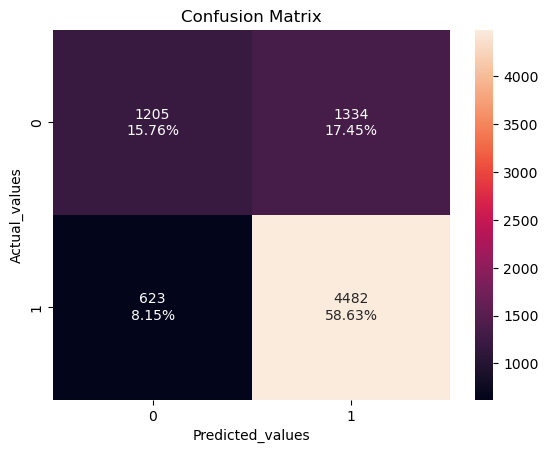

In [287]:
checking_confution_matrix(gb_estimator_best,x_test,y_test)

***Observation***
- There is slight difference in the recall score comparing the Ada boosting and gradient boosting 

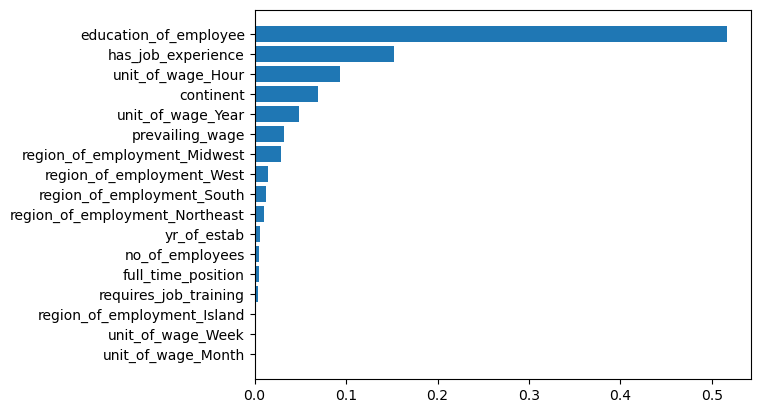

In [312]:
feature_name=x_train.columns.to_list()
importance =gb_estimator_best.feature_importances_
ada_indecies=np.argsort(importance)
plt.barh(range(len(ada_indecies)),importance[ada_indecies])
plt.yticks(range(len(ada_indecies)),[feature_name[i] for i in ada_indecies]);

### XGBoosting 

In [294]:
xg_boosting=XGBClassifier(random_state=1,eval_metric='logloss',verbosity = 0)
xg_boosting.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=1, ...)

In [296]:
xg_boosting_train=check_model_performance(xg_boosting,x_train,y_train)
checking_confution_matrix(gb_estimator_best,x_test,y_test)

,recall,accuracy,precision,f1_score
0,0.93654,0.850191,0.853438,0.89306


In [297]:
xg_boosting_test=check_model_performance(xg_boosting,x_test,y_test)
xg_boosting_test

,recall,accuracy,precision,f1_score
0,0.85191,0.725144,0.763786,0.805445


### Observation
- The scores have much difference compared to train and test 
- The data has collected more noise and outliers in the data 

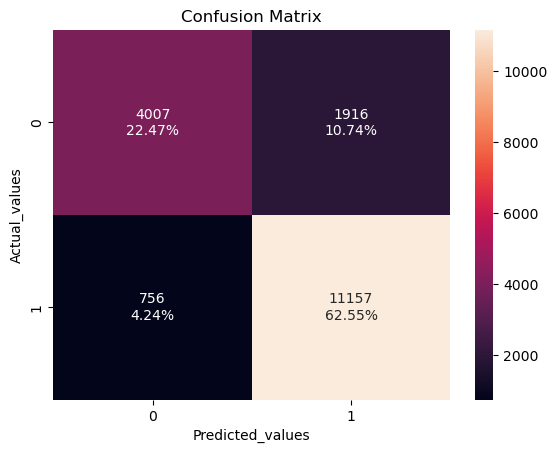

In [306]:
checking_confution_matrix(xg_boosting,x_train,y_train)

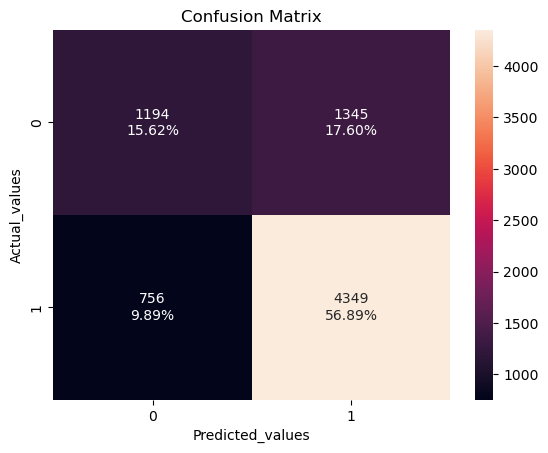

In [305]:
checking_confution_matrix(xg_boosting,x_test,y_test)

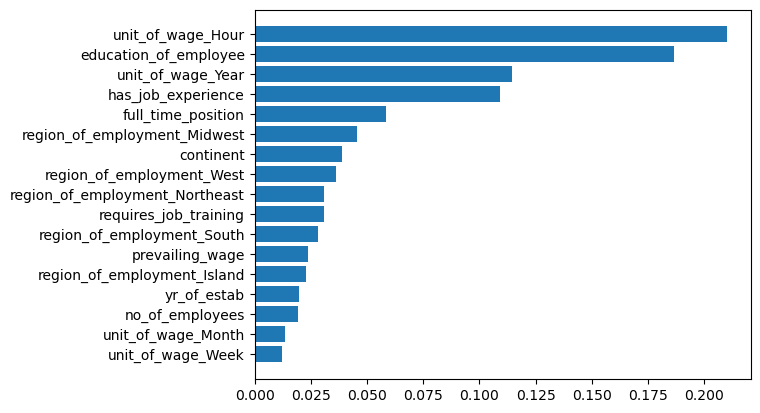

In [310]:
feature_name=x_train.columns.to_list()
importance =xg_boosting.feature_importances_
ada_indecies=np.argsort(importance)
plt.barh(range(len(ada_indecies)),importance[ada_indecies])
plt.yticks(range(len(ada_indecies)),[feature_name[i] for i in ada_indecies]);

### XGBoosting with parameter

In [302]:
xgb_tuned = XGBClassifier(random_state=1,eval_metric='logloss')

# Grid of parameters to choose from
## add from
param_xg_grid={'n_estimators':np.arange(50,110,25),
            'scale_pos_weight':[1,2,5],
            'learning_rate':[0.01,0.1,0.05],
            'gamma':[1,3],
            'subsample':[0.7,0.9]
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, param_xg_grid,scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(x_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=3, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=50,
              n_jobs=None, num_parallel_tree=None, random_state=1, ...)

In [303]:
xgb_tuned_train=check_model_performance(xgb_tuned,x_train,y_train)
xgb_tuned_train

,recall,accuracy,precision,f1_score
0,0.898766,0.759251,0.776151,0.83297


In [304]:
xgb_tuned_test=check_model_performance(xgb_tuned,x_test,y_test)
xgb_tuned_test

,recall,accuracy,precision,f1_score
0,0.887757,0.741758,0.763863,0.821163


***Observation***
- Comparing to all hyper model the xgboost score are best result with out any over fitting and noise 

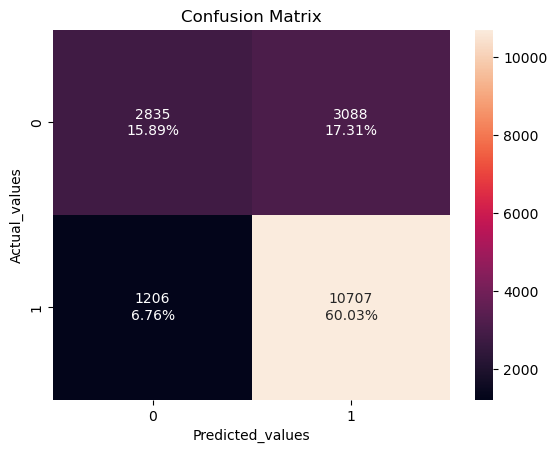

In [308]:
checking_confution_matrix(xgb_tuned,x_train,y_train)

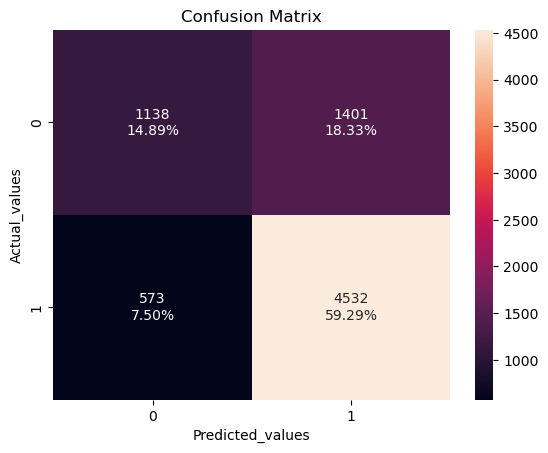

In [307]:
checking_confution_matrix(xgb_tuned,x_test,y_test)

***Observation***
- The overcall FP and FN the values are well balanced 

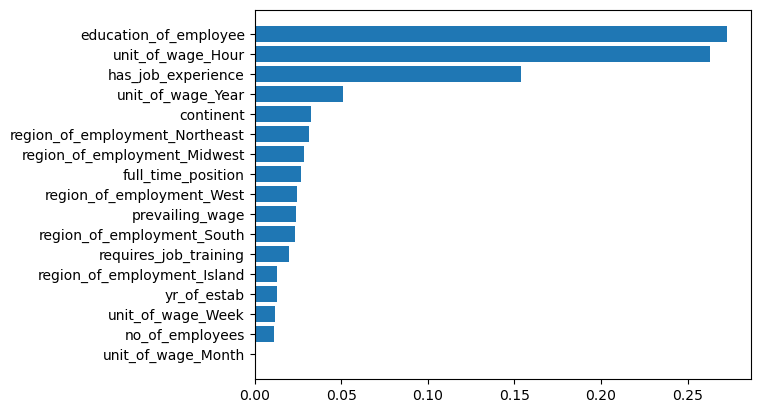

In [309]:
feature_name=x_train.columns.to_list()
importance =xgb_tuned.feature_importances_
ada_indecies=np.argsort(importance)
plt.barh(range(len(ada_indecies)),importance[ada_indecies])
plt.yticks(range(len(ada_indecies)),[feature_name[i] for i in ada_indecies]);

### Stacking Model 

In [326]:
estimators=[('Decision Tree', Dtree_estimator),('Random Forest', rf_estimator_1),
           ('Gradient Boosting', gb_estimator_best)]
final_estimator=XGBClassifier(random_state=1)

In [329]:
stacking_estimator=StackingClassifier(estimators=estimators, final_estimator=final_estimator,cv=5)
stacking_estimator.fit(x_train,y_train)

StackingClassifier(cv=5,
                   estimators=[('Decision Tree',
                                DecisionTreeClassifier(class_weight='balanced',
                                                       max_depth=4,
                                                       max_leaf_nodes=7,
                                                       min_impurity_decrease=0.001,
                                                       min_samples_split=3,
                                                       random_state=1)),
                               ('Random Forest',
                                RandomForestClassifier(class_weight='balanced',
                                                       max_depth=6,
                                                       max_leaf_nodes=8,
                                                       min_impurity_decrease=0.001,
                                                       n_estimators=80,
                                                       random_state=1)),
                               ('Gr...
                                                 feature_types=None, gamma=None,
                                                 grow_policy=None,
                                                 importance_type=None,
                                                 interaction_constraints=None,
                                                 learning_rate=None,
                                                 max_bin=None,
                                                 max_cat_threshold=None,
                                                 max_cat_to_onehot=None,
                                                 max_delta_step=None,
                                                 max_depth=None,
                                                 max_leaves=None,
                                                 min_child_weight=None,
                                                 missing=nan,
                                                 monotone_constraints=None,
                                                 multi_strategy=None,
                                                 n_estimators=None, n_jobs=None,
                                                 num_parallel_tree=None,
                                                 random_state=1, ...))

In [330]:
stacking_estimator_train=check_model_performance(stacking_estimator,x_train,y_train)
stacking_estimator_train

,recall,accuracy,precision,f1_score
0,0.866868,0.747197,0.779396,0.820808


In [331]:
stacking_estimator_test=check_model_performance(stacking_estimator,x_test,y_test)
stacking_estimator_test

,recall,accuracy,precision,f1_score
0,0.863075,0.738095,0.771764,0.81487


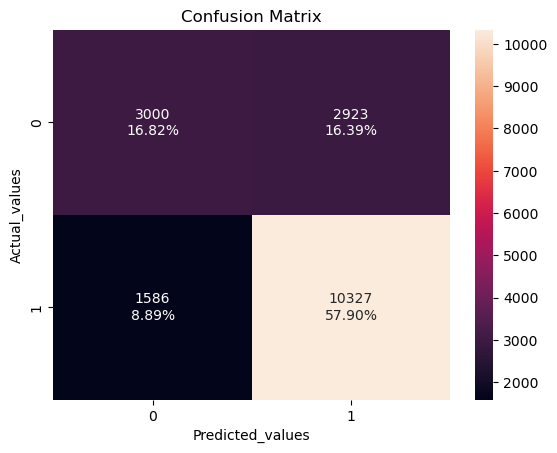

In [335]:
checking_confution_matrix(stacking_estimator,x_train,y_train)

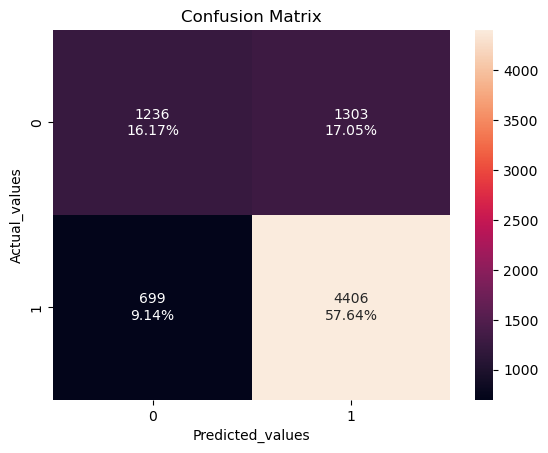

In [345]:
checking_confution_matrix(stacking_estimator,x_test,y_test)

***Obseravtion***
- Comapring the xgboost and the stacking the stacking had given better results. 
- The model had performed good but there slight lesser in recall and f1_score 

## Model Performance Comparison and Conclusions

In [342]:
models_test_comp_df = pd.concat(
    [Dtree_train.T, Dtree_estimator_train.T, bagging_model_train.T,Bagging_estimator_train.T,
    rf_model_train.T,rf_estimator_train.T,ada_model_train.T,Ada_estimator_best_train.T,
    gb_model_train.T,gb_estimator_train.T,xgb_tuned_train.T,xg_boosting_train.T,
     stacking_estimator_train.T],
    axis=1,
)

models_test_comp_df.columns = [
    "Decision Tree",
    "Decision Tree Tuned",
    "bagging_model",
    "bagging_model_Tuned",
    "Random Forest Estimator",
    "Random Forest Tuned",
    "Adaboost ",
    "Adaboost Tuned",
    "Gradient Boost Estimator",
    "Gradient Boost Tuned",
    "XGB",
    "XGB Tuned",
    "Stacking Classifier"
]

print("Training performance comparison:")
models_test_comp_df

Training performance comparison:


,Decision Tree,Decision Tree Tuned,bagging_model,bagging_model_Tuned,Random Forest Estimator,Random Forest Tuned,Adaboost,Adaboost Tuned,Gradient Boost Estimator,Gradient Boost Tuned,XGB,XGB Tuned,Stacking Classifier
recall,1.0,0.779569,0.985814,0.999245,1.0,0.763032,1.0,0.778813,0.886846,0.884076,0.898766,0.936540,0.866868
accuracy,1.0,0.716641,0.984357,0.668367,1.0,0.710866,1.0,0.716528,0.757569,0.753981,0.759251,0.850191,0.747197
precision,1.0,0.792744,0.990720,0.668389,1.0,0.795693,1.0,0.793059,0.780223,0.777901,0.776151,0.853438,0.779396
f1_score,1.0,0.786101,0.988261,0.800996,1.0,0.779020,1.0,0.785872,0.830125,0.827597,0.832970,0.893060,0.820808


In [344]:
models_test_comp_df = pd.concat(
    [Dtree_test.T, Dtree_estimator_test.T, bagging_model_test.T,Bagging_estimator_test.T,
    rf_model_test.T,rf_estimator_test.T,ada_model_test.T,Ada_estimator_best_test.T,
    gb_model_test.T,gb_estimator_test.T,xg_boosting_test.T,xgb_tuned_test.T,
     stacking_estimator_test.T],
    axis=1,
)

models_test_comp_df.columns = [
    "Decision Tree",
    "Decision Tree Tuned",
    "bagging_model",
    "bagging_model_Tuned",
    "Random Forest Estimator",
    "Random Forest Tuned",
    "Adaboost ",
    "Adaboost Tuned",
    "Gradient Boost Estimator",
    "Gradient Boost Tuned",
    "XGB",
    "XGB Tuned",
    "Stacking Classifier"
]

print("Training performance comparison:")
models_test_comp_df

Training performance comparison:


,Decision Tree,Decision Tree Tuned,bagging_model,bagging_model_Tuned,Random Forest Estimator,Random Forest Tuned,Adaboost,Adaboost Tuned,Gradient Boost Estimator,Gradient Boost Tuned,XGB,XGB Tuned,Stacking Classifier
recall,0.733399,0.782370,0.781587,0.999804,0.848384,0.765132,0.844466,0.780215,0.880509,0.877963,0.851910,0.887757,0.863075
accuracy,0.647043,0.715594,0.700026,0.668367,0.724359,0.710230,0.722266,0.714547,0.745421,0.743982,0.725144,0.741758,0.738095
precision,0.736863,0.789796,0.772059,0.668238,0.764654,0.793580,0.764362,0.789808,0.770880,0.770633,0.763786,0.763863,0.771764
f1_score,0.735127,0.786066,0.776794,0.801067,0.804346,0.779096,0.802420,0.784982,0.822056,0.820804,0.805445,0.821163,0.814870


## Actionable Insights and Recommendations

- `unit_of_wage_hour`,`has_job_expreience`,`unit_of_wage_year`,`continent` are the some of the top feature that most of the model predicted. The person with these feature have hiher chance of getting the visa.
- `unit_of wages_month`,`unit_wages_week`,`no_of_employee` are the some of the least feature that most of the model have predicted. That say the company with the highest number of employees doesn't help for the people to get visa.
- `unit_of_wage_hour` is one of the top feature because in usa the contract employees get payied on the hourly bases. 
- People with contracting or fulltime with good experence are the highest possible for getting the visa 
- People choosing the region_of_employement_island will reduce the chance of the visa approval.
- `contients` has a very positve significent rool 